# Projet 3 - Application au service de la santé
# "Nutriscore du petit déjeuner"
## Nettoyage des données

# Idée d'application : score du petit-déjeuner
Pour le petit-déjeuner, les produits sont principalement constitués de :  
      - matière grasse dont acides gras saturés  
      - glucides  
      - fibres  
      - proteines  
      - sel  
On trouve également l'information de la valeur énergétique.

Le calcul du Nutriscore se fait sur la base des éléments suivants :
Densité énergétique, Graisses saturées, Sucres simples, Sodium, Fruits et légumes, Légumineuses et fruits à coque, Fibres, Protéines. On constate que les informations sont quasiment identiques entre ce qui est affiché sur l'étiquette et le calcul du nutriscore.

On peut donc se baser sur le calcul du nutriscore pour obtenir notre note.

Cette application sera fonctionnelle de préférence pour la France, l'appel d'offre ayant été demandé par Santé Publique France.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

pd.options.display.max_columns = None


In [2]:
data = pd.read_csv('./Données/Data-openfoodfacts.csv', sep="\t")
print(f'Le fichier data contient {data.shape[0]} lignes et {data.shape[1]} colonnes'.format())
data.head()

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Le fichier data contient 320772 lignes et 162 colonnes


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [3]:
data.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [4]:
data.duplicated().sum()

0

### Calcul du nombre d'indicateurs restant en fonction du seuil de remplissage

<AxesSubplot:>

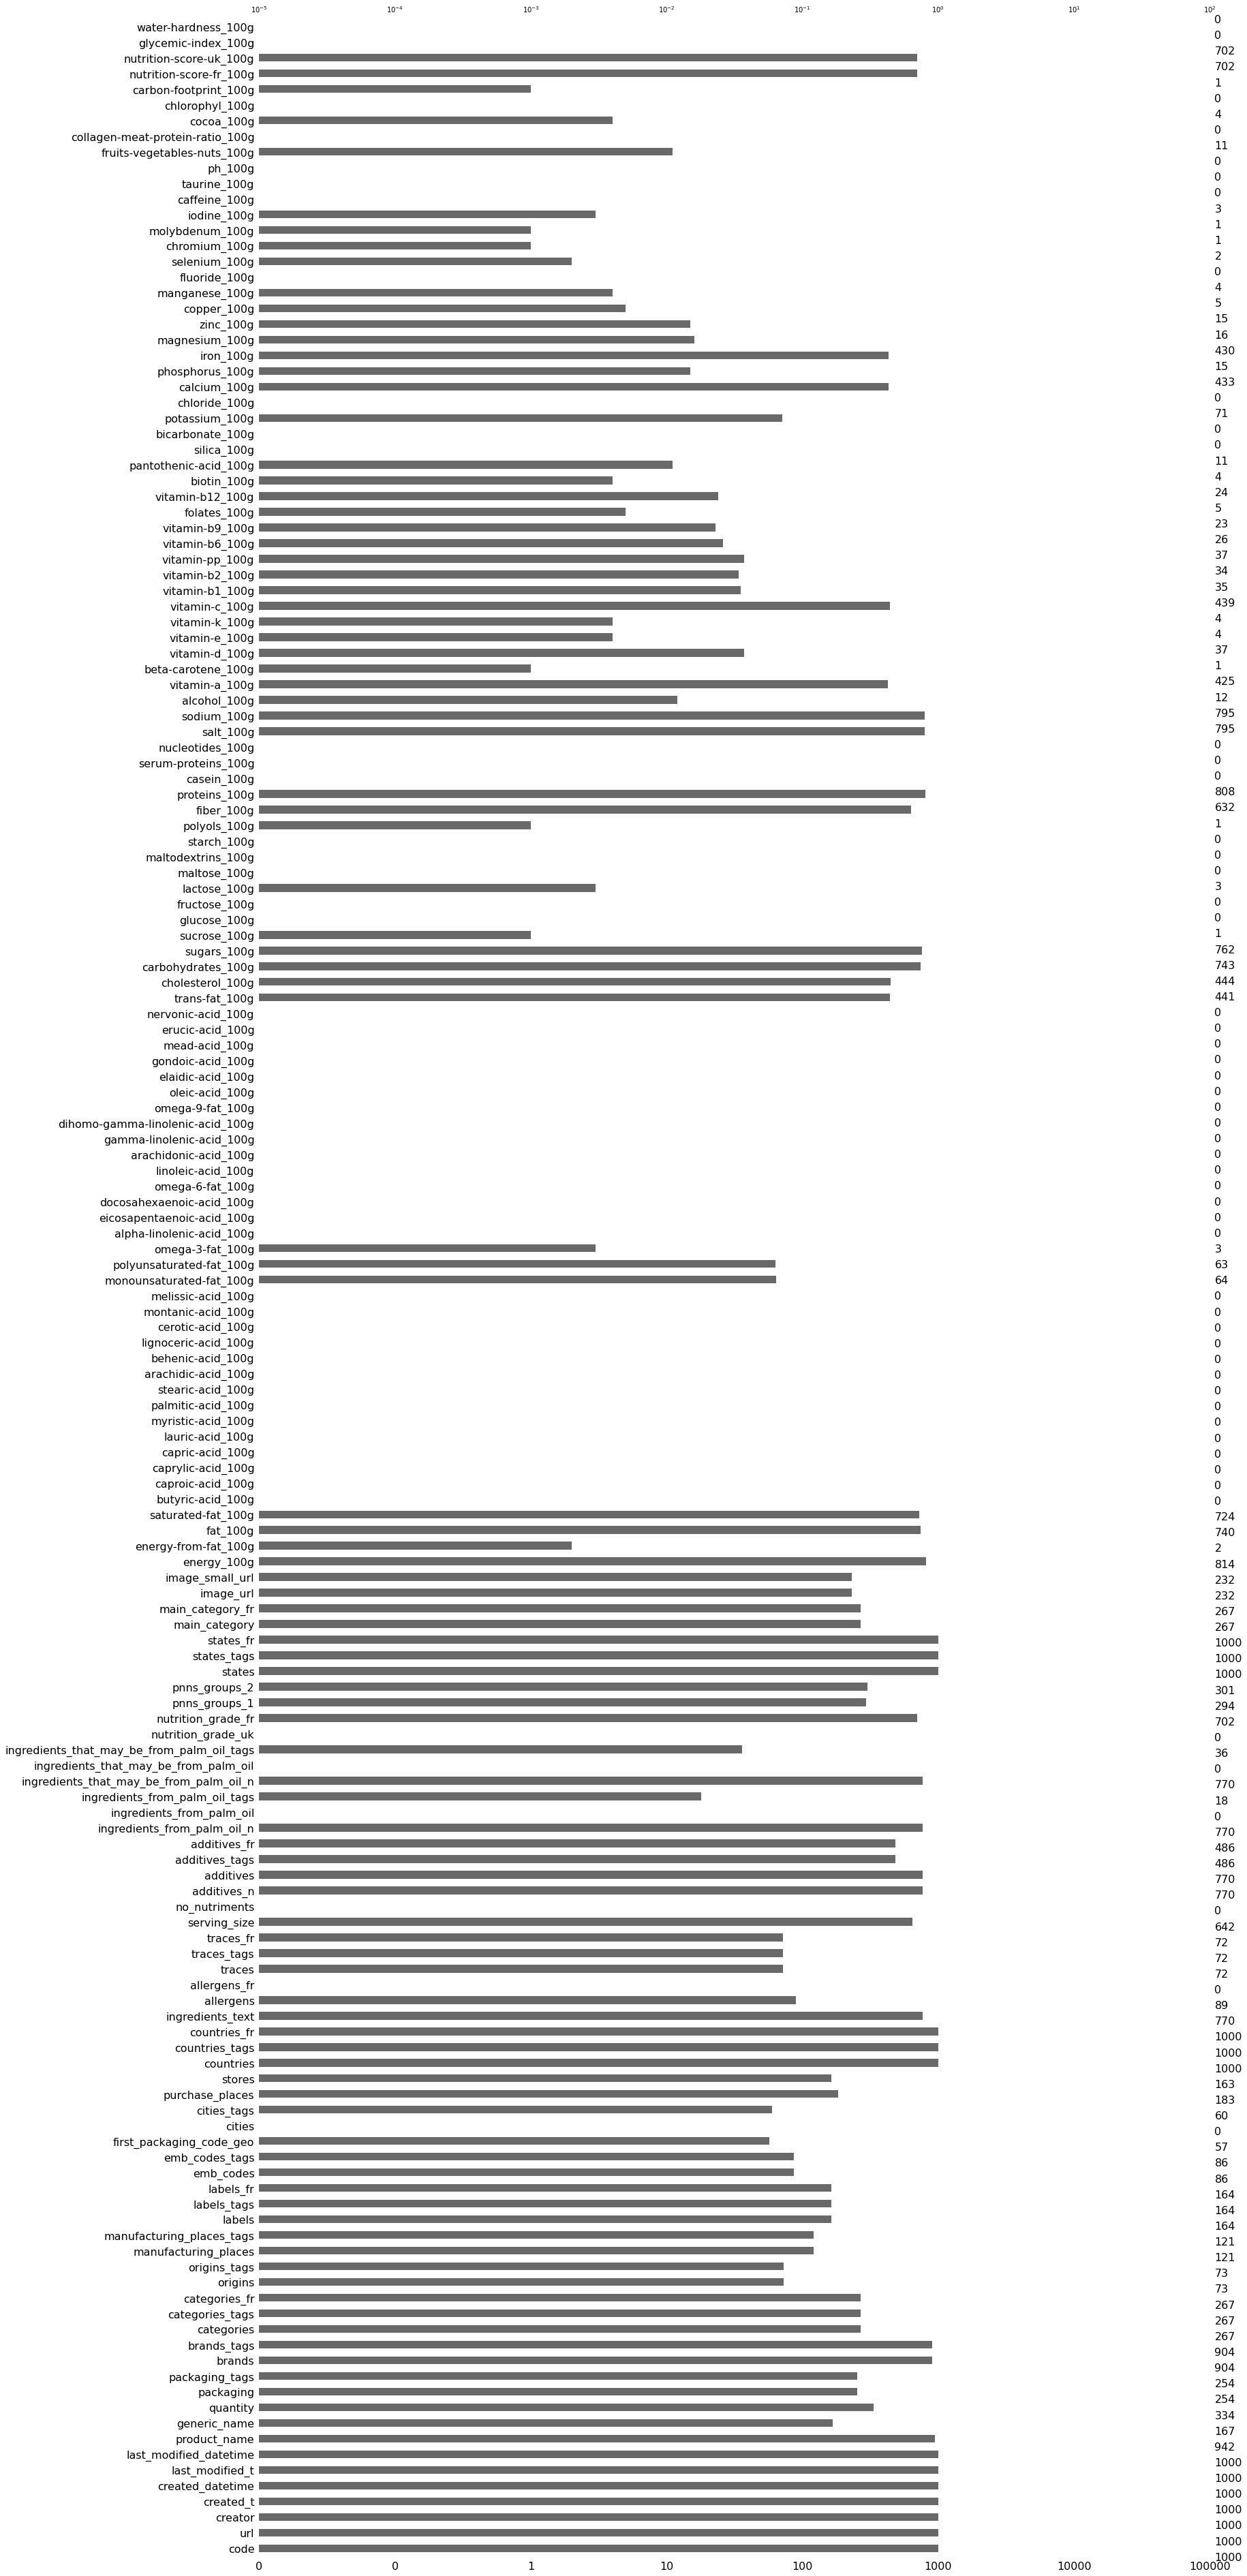

In [5]:
# Visualisation du remplissage des features
msno.bar(data.sample(1000),log=True)

In [6]:
# Fonction sur le taux de remplissage des features sur la matrice initiale. Il serait potentiellement préférable de calculer le % de remp et de rajouter la ligne
# avant de faire tourner la boucle.
# Retourne : 1) le nombre d'indicateurs restants ; 2) La liste des indicateurs restants
def taux_remp(df,seuil):
    df.loc['Taux_remp en %']=(1-df.isna().sum()/len(df))*100
    ddf=df.loc[['Taux_remp en %']]
    for c in ddf.columns:
        if ddf[c].values < seuil:
             ddf.drop([c],axis=1,inplace=True)
    return ddf.shape[1],ddf.columns.to_list()        

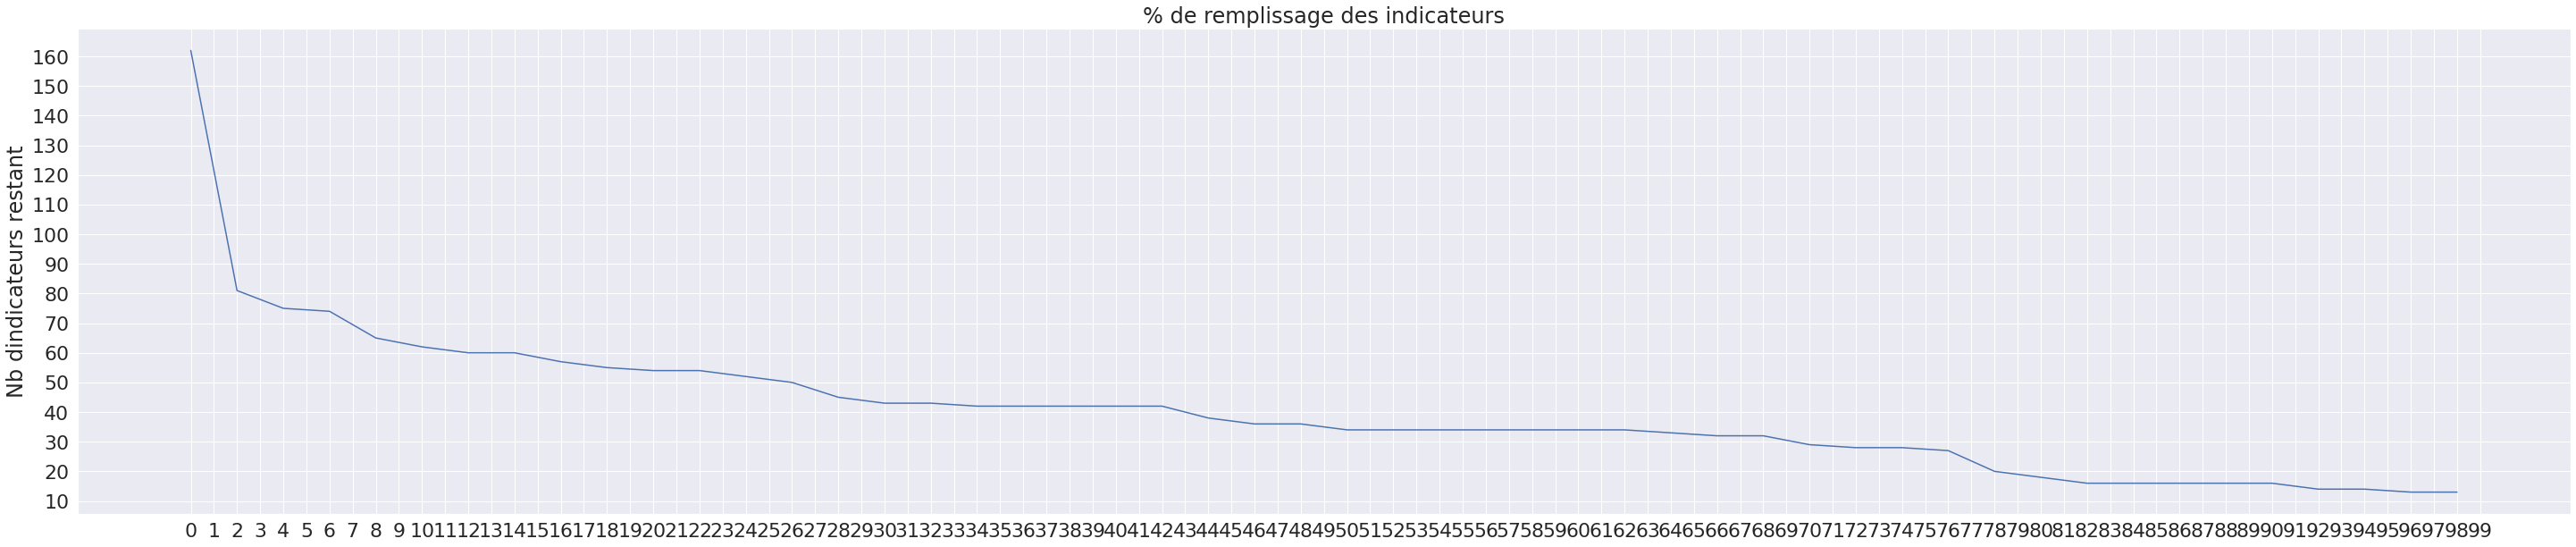

In [7]:
domaine=np.arange(0,100,2) #Tous les seuils de 0 à 100% de remplissage sont testés
y = []

for i in domaine:
    y.append(taux_remp(data,i)[0])
sns.set(font_scale = 2)
sns.set_style('darkgrid',{'axes.grid': True})
plt.rcParams["figure.figsize"] = (50,10)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Nb d''indicateurs restant')
plt.title('% de remplissage des indicateurs')
plt.xticks(np.arange(0, 100, 1))
plt.yticks(np.arange(0, 162, 10))
plt.plot(domaine,y)

On observe 2 seuils, à 35 et 55% de remplissage

In [8]:
print(taux_remp(data,35)[0], ',' ,taux_remp(data,55)[0], ',' ,taux_remp(data,61)[0])


42 , 34 , 34


Les 8 variables en plus ne seront pas utiles pour notre application.

In [9]:
# Création d'un nouveau DataFrame ne contenant que les colonnes avec un seuil de remplissage > 50 %
data_filtree=data[taux_remp(data,55)[1]]
data_filtree.loc['Taux_remp en %']

code                                        99.99283
url                                         99.99283
creator                                    99.999377
created_t                                  99.999065
created_datetime                           99.997194
last_modified_t                                100.0
last_modified_datetime                         100.0
product_name                               94.462751
brands                                     91.142646
brands_tags                                91.140152
countries                                  99.912711
countries_tags                             99.912711
countries_fr                               99.912711
ingredients_text                           77.613453
serving_size                               65.882104
additives_n                                77.606282
additives                                  77.595683
ingredients_from_palm_oil_n                77.606282
ingredients_that_may_be_from_palm_oil_n    77.

In [10]:
print('Le taux de remplissage moyen est de {0:.2f} %'.format(data.loc['Taux_remp en %'].mean()))

Le taux de remplissage moyen est de 23.78 %


In [11]:
data_filtree.shape

(320773, 34)

In [12]:
# Suppression de la colonne Taux de remp
data.drop('Taux_remp en %',axis=0,inplace=True)
data_filtree.drop('Taux_remp en %',axis=0,inplace=True)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Assignation des bons types

In [13]:
List_numerique=['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g', \
                'fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g', \
                'salt_100g','sodium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g']
List_string = ['brands','brands_tags','countries','countries_tags','countries_fr','ingredients_text',
               'additives','nutrition_grade_fr','states','states_tags','states_fr']

In [14]:
for c in List_numerique:
    data_filtree[c]=pd.to_numeric(data_filtree[c],errors='coerce')

data_filtree[List_string] = data_filtree[List_string].astype(str)

/tmp/ipykernel_88821/2376105428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtree[c]=pd.to_numeric(data_filtree[c],errors='coerce')
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
data_filtree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320772 entries, 0 to 320771
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   brands                                   320772 non-null  object 
 9   brands_tags                              320772 non-null  object 
 10  countries                            

## Traitement des pays

Trois actions pour les pays :  
- Choix de la colonne à conserver

- Mise au propre des valeurs :
    - Conservation que du premier pays renseigné
    - Suppression du 'en:'

### 1 ) Choix des colonnes

In [16]:
# Comparaison de countries et countries_fr
(data_filtree['countries'].isna() == data_filtree['countries_fr'].isna()).value_counts()

True    320772
dtype: int64

In [17]:
# Comparaison de countries et countries_tags
(data_filtree['countries'].isna() == data_filtree['countries_tags'].isna()).value_counts()

True    320772
dtype: int64

Pour les pays, les 3 colonnes renseignées de façon identiques, conservation qu'1 sur 3 (countries_fr)

### 2 ) Mise au propre des noms

In [18]:
#Conservation du premier pays
data_filtree.reset_index(drop=True)
data_filtree['countries_fr'] = data_filtree['countries_fr'].str.split(',', n=1, expand=True)[0]

# Suppression des en :
data_filtree['countries_fr']=data_filtree['countries_fr'].str.lstrip('en:')
data_filtree['countries_fr'].unique().tolist()

/tmp/ipykernel_88821/1865455795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtree['countries_fr'] = data_filtree['countries_fr'].str.split(',', n=1, expand=True)[0]
/tmp/ipykernel_88821/1865455795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtree['countries_fr']=data_filtree['countries_fr'].str.lstrip('en:')


['France',
 'États-Unis',
 'Royaume-Uni',
 'Canada',
 'Suisse',
 'Espagne',
 'Allemagne',
 'Slovénie',
 'Italie',
 'Roumanie',
 'Australie',
 'Portugal',
 'Belgique',
 'Guadeloupe',
 'an',
 'Pays-Bas',
 'Irlande',
 'Taiwan',
 'Brésil',
 'République dominicaine',
 'Arabie saoudite',
 'Émirats arabes unis',
 'Irak',
 'Koweït',
 'Moldavie',
 'Nouvelle-Calédonie',
 'Singapour',
 'Finlande',
 'Polynésie française',
 'Panama',
 'Costa Rica',
 'Mexique',
 'Thaïlande',
 'Chine',
 'Luxembourg',
 'Liban',
 'Danemark',
 'Malaisie',
 'Guyana',
 'Serbie',
 'Martinique',
 'Barbade',
 'Aruba',
 'Hong Kong',
 'Norvège',
 'Haïti',
 'Salvador',
 'Bahreïn',
 'La Réunion',
 'Maroc',
 'Oman',
 'Corée du Sud',
 'Trinité-et-Tobago',
 'Chili',
 'Cuba',
 'Philippines',
 'United-states-of-america',
 'Autriche',
 'Suède',
 'Guinée',
 'Israël',
 'Russie',
 'Saint-Pierre-et-Miquelon',
 'Algérie',
 'Quebec',
 'République tchèque',
 'Maurice',
 'Indonésie',
 'Arménie',
 "Côte d'Ivoire",
 'Pologne',
 'Grèce',
 'Inde'

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/agent/Logiciels/anaconda3/lib/python3

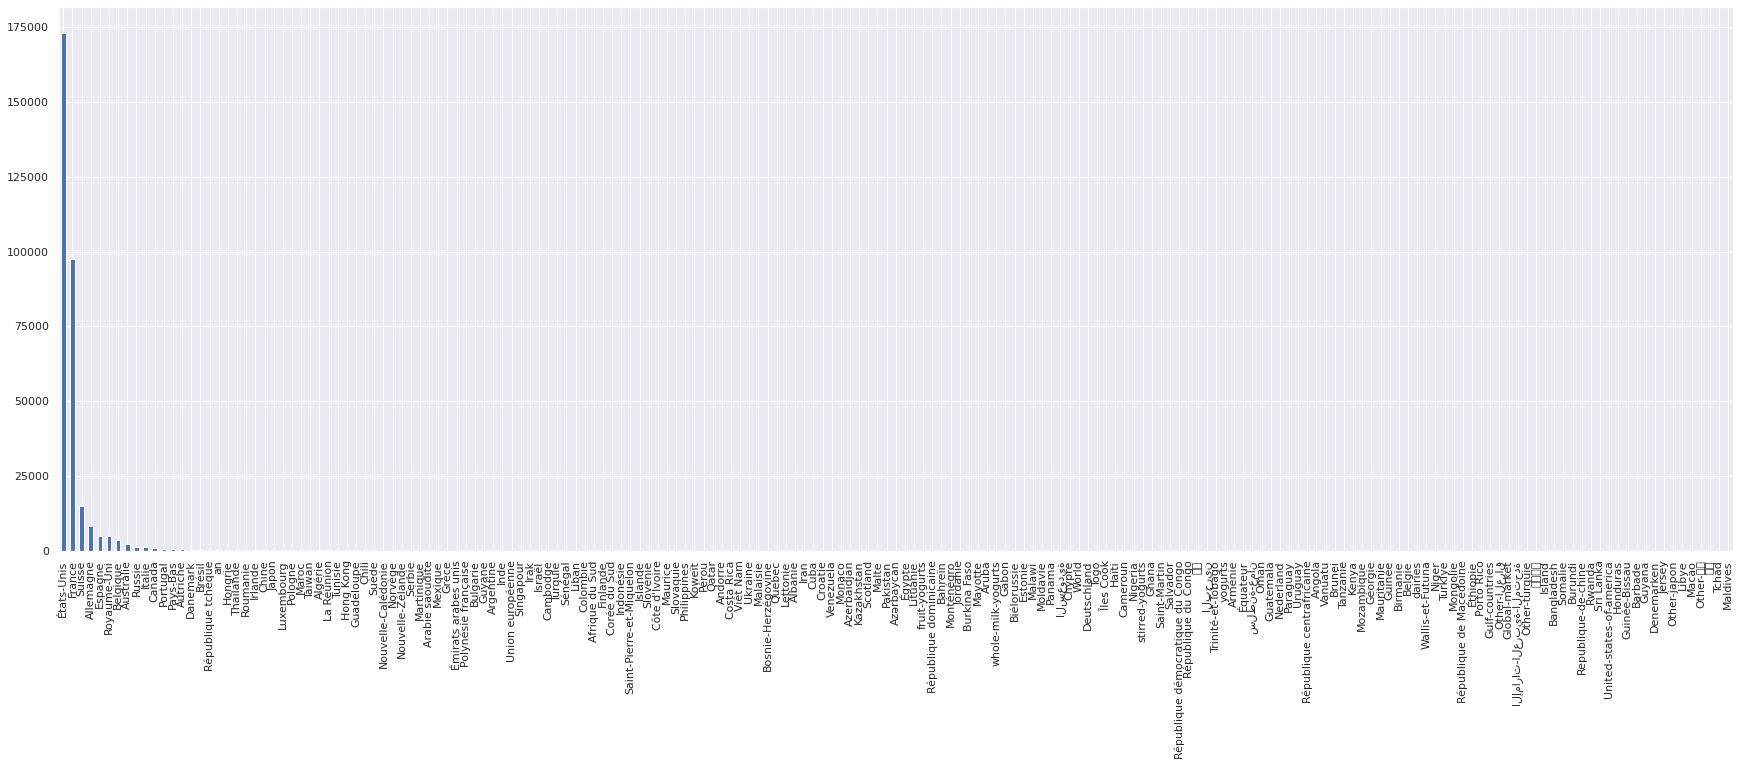

In [19]:
sns.set()
# Diagramme en tuyaux d'orgues
plt.rcParams["figure.figsize"] = (30,10) # taille de chacune des figures
data_filtree["countries_fr"].value_counts().plot(kind='bar')
plt.show()

Les deux pays les plus renseignés sont la France et les Etats-Unis. Décision de réaliser l'application avec les données Française 

## 3 ) Création du Dataframe filtré sur les pays

In [20]:
data_filtree = data_filtree[(data_filtree['countries_fr'] =='France')]
data_filtree.reset_index(drop=True).head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,nan,nan,France,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,nan,nan,en:FR,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,Sunridge,sunridge,"France, US","en:france,en:united-states",France,"Milk chocolate coating (evaporated cane juice,...",40 g (0.25 cup),1.0,[ milk-chocolate-coating -> en:milk-chocolate...,0.0,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0,22.0
4,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,nan,nan,France,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(f' {data_filtree.shape[0]} produits restent dans la base'.format())

 97448 produits restent dans la base


## Traitement et ajout des catégories  
Pour notre application, nous avons besoin de sélectionner des catégories ayant un lien avec le petit déjeuner

In [22]:
variables_categories=['code','pnns_groups_1','pnns_groups_2','main_category','main_category_fr','categories', 'categories_tags', 'categories_fr']
data_categories=data[variables_categories]
data_categories

,code,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,categories,categories_tags,categories_fr
0,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
320767,9948282780603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,Salty snacks,Appetizers,en:chips-and-fries,Chips et frites,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch..."
320770,9980282863788,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Suppression des produits ne contenant aucune catégorie
data_categories_temp=data_categories.dropna(subset=['pnns_groups_1','pnns_groups_2','main_category','main_category_fr','categories','categories_tags','categories_fr'],how='all')
data_categories_temp.shape

(94537, 8)

In [24]:
# Nombre de valeur unique dans chacune des colonnes de catégorie

data_categories_temp.nunique()

code                94509
pnns_groups_1          14
pnns_groups_2          42
main_category        3543
main_category_fr     3543
categories          36982
categories_tags     21142
categories_fr       21152
dtype: int64

Les catégories pnns_groups_1 et pnns_groups_2 sont les plus renseignées et celles contenant le moins de sous catégories

Traitement des textes

In [25]:
print (data_categories_temp.pnns_groups_1.unique().tolist())

['unknown', 'Fruits and vegetables', 'Sugary snacks', 'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs', 'Beverages', 'Fat and sauces', 'fruits-and-vegetables', nan, 'Milk and dairy products', 'Salty snacks', 'sugary-snacks', 'cereals-and-potatoes', 'salty-snacks']


In [26]:
print (data_categories_temp.pnns_groups_2.unique().tolist())

['unknown', 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets', 'Non-sugared beverages', 'Sweetened beverages', 'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups', 'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers', 'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages', 'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts', 'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits', 'Salty and fatty products', 'cereals', nan, 'legumes', 'nuts']


In [27]:
# Mise en forme des colonnes
# Mise en type String
data_categories[['pnns_groups_1','pnns_groups_2']] = data_categories[['pnns_groups_1','pnns_groups_2']].astype(str)

# Minuscule pour tous
data_categories['pnns_groups_1'] = data_categories['pnns_groups_1'].apply(lambda x:x.lower() if str(x)!='nan' else x)
data_categories['pnns_groups_2'] = data_categories['pnns_groups_2'].apply(lambda x:x.lower() if str(x)!='nan' else x)

# Rempalcement des '-' par des ' '
data_categories['pnns_groups_1'] = data_categories['pnns_groups_1'].str.replace('-',' ')


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/tmp/ipykernel_88821/911215221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categories['pnns_groups_1'] = data_categories['pnns_groups_1'].apply(lambda x:x.lower() if str(x)!='nan' else x)
/tmp/ipykernel_88821/911215221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [28]:
data_categories.pnns_groups_1.unique().tolist()

['nan',
 'unknown',
 'fruits and vegetables',
 'sugary snacks',
 'cereals and potatoes',
 'composite foods',
 'fish meat eggs',
 'beverages',
 'fat and sauces',
 'milk and dairy products',
 'salty snacks']

In [29]:
data_categories.pnns_groups_2.unique()

array(['nan', 'unknown', 'vegetables', 'biscuits and cakes', 'bread',
       'legumes', 'pizza pies and quiche', 'meat', 'sweets',
       'non-sugared beverages', 'sweetened beverages',
       'dressings and sauces', 'one-dish meals', 'soups',
       'chocolate products', 'alcoholic beverages', 'fruits', 'sandwich',
       'cereals', 'milk and yogurt', 'fats', 'cheese', 'appetizers',
       'nuts', 'breakfast cereals', 'artificially sweetened beverages',
       'fruit juices', 'eggs', 'fish and seafood', 'dried fruits',
       'ice cream', 'processed meat', 'potatoes', 'dairy desserts',
       'fruit nectars', 'pastries', 'tripe dishes',
       'salty and fatty products'], dtype=object)

In [30]:
data_categories=data_categories[['code','pnns_groups_1','pnns_groups_2']]

In [31]:
data_categories.shape

(320772, 3)

In [32]:
data_filtree.shape

(97448, 34)

In [33]:
# Suppression des doublons sur 'code' dans le dataframe avec les catégories avant la jointure gauche
data_categories.drop_duplicates(subset=['code'],inplace=True)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [34]:
# Fusion des 2 dataframes par la gauche pour avoir les catégories des produits retenus

data_filtree=pd.merge(data_filtree,data_categories,on='code',how='left')
print(data_filtree.shape)
data_filtree.head()

(97448, 36)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pnns_groups_1,pnns_groups_2
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
1,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,nan,nan,France,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
2,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,nan,nan,en:FR,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
3,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,Sunridge,sunridge,"France, US","en:france,en:united-states",France,"Milk chocolate coating (evaporated cane juice,...",40 g (0.25 cup),1.0,[ milk-chocolate-coating -> en:milk-chocolate...,0.0,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0,22.0,unknown,unknown
4,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,nan,nan,France,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


In [35]:
data_filtree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97448 entries, 0 to 97447
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     97448 non-null  object 
 1   url                                      97448 non-null  object 
 2   creator                                  97448 non-null  object 
 3   created_t                                97448 non-null  object 
 4   created_datetime                         97447 non-null  object 
 5   last_modified_t                          97448 non-null  object 
 6   last_modified_datetime                   97448 non-null  object 
 7   product_name                             90266 non-null  object 
 8   brands                                   97448 non-null  object 
 9   brands_tags                              97448 non-null  object 
 10  countries                                97448

On remarque que l'ensemble des produits conservés ont bien une catégorie de renseignée.

## Filtre des données selon les catégories  
Décision de filter sur pnns_groups_2 qui est plus détaillé pour le petit-déjeuner, même si les analyses pourront se faire sur pnns_groups_1

In [36]:
data_filtree = data_filtree[(data_filtree['pnns_groups_2'] =='biscuits and cakes') \
                                | (data_filtree['pnns_groups_2'] =='chocolate products') | (data_filtree['pnns_groups_2'] =='milk and yogurt')\
                                | (data_filtree['pnns_groups_2'] =='bread') | (data_filtree['pnns_groups_2'] =='nuts') \
                                | (data_filtree['pnns_groups_2'] =='breakfast cereals') | (data_filtree['pnns_groups_2'] =='dried fruits') \
                                | (data_filtree['pnns_groups_2'] =='fruits') | (data_filtree['pnns_groups_2'] =='fruit juices') \
                                | (data_filtree['pnns_groups_2'] =='fruit nectars')]

In [37]:
data_filtree.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pnns_groups_1,pnns_groups_2
8,7730009,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1462806432,2016-05-09T15:07:12Z,1482359150,2016-12-21T22:25:50Z,Biscuits sablés fourrage au cacao,St Michel,st-michel,France,en:france,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,0.0,1.0,nan,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,biscuits and cakes
22,10,http://world-fr.openfoodfacts.org/produit/0000...,jeanbono,1476947941,2016-10-20T07:19:01Z,1476954879,2016-10-20T09:14:39Z,Madeleines nature,Bijou,bijou,France,en:france,France,"Farine de _blé_, huile de colza, sucre, _oeufs...",17.6g,5.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,1.0,d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",1900.0,23.0,2.5,55.0,26.0,1.5,6.0,0.66,0.259843,12.0,12.0,sugary snacks,biscuits and cakes
24,30,http://world-fr.openfoodfacts.org/produit/0000...,beniben,1481840144,2016-12-15T22:15:44Z,1481840644,2016-12-15T22:24:04Z,Cakes Raisins,Bijou,bijou,France,en:france,France,"Farine de _blé_, _œufs_ frais, huile de colza,...",30 g,5.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,1.0,d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",1768.0,19.0,2.5,56.0,28.0,1.8,5.8,0.65,0.255906,13.0,13.0,sugary snacks,biscuits and cakes
26,31,http://world-fr.openfoodfacts.org/produit/0000...,beniben,1468014954,2016-07-08T21:55:54Z,1471551390,2016-08-18T20:16:30Z,Cakes aux Fruits,Bijou,bijou,France,en:france,France,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",30 g,11.0,[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,0.0,1.0,d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",1670.0,15.0,2.0,60.0,34.0,1.5,4.9,0.60,0.236220,12.0,12.0,sugary snacks,biscuits and cakes
28,50,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1480541444,2016-11-30T21:30:44Z,1480542021,2016-11-30T21:40:21Z,Financiers aux Amandes,Bijou,bijou,France,en:france,France,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",22 g,3.0,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,0.0,0.0,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",1868.0,23.0,10.0,51.0,39.0,1.7,8.0,0.55,0.216535,22.0,22.0,sugary snacks,biscuits and cakes


In [38]:
print(f' {data_filtree.shape[0]} produits restent dans la base'.format())

 14395 produits restent dans la base


## Vérification des doublons et des vides sur le code article et nom produit
Au regard de notre application, nous ne pouvons pas conserver ni de code article ni de nom de produit vide

In [39]:
data_filtree['code'].isna().sum()

0

In [40]:
data_filtree.duplicated('code').sum()

0

In [41]:
data_filtree[data_filtree['product_name'].isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pnns_groups_1,pnns_groups_2
518,364539,http://world-fr.openfoodfacts.org/produit/0036...,teolemon,1490121323,2017-03-21T18:35:23Z,1491141098,2017-04-02T13:51:38Z,NaN,M&S,m-s,"France,United Kingdom","en:france,en:united-kingdom",France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,chocolate products
944,679220,http://world-fr.openfoodfacts.org/produit/0067...,teolemon,1416860458,2014-11-24T20:20:58Z,1491147506,2017-04-02T15:38:26Z,NaN,Marks & Spencer,marks-spencer,"France,UK","en:france,en:united-kingdom",France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,chocolate products
1292,847735,http://world-fr.openfoodfacts.org/produit/0084...,teolemon,1396215392,2014-03-30T21:36:32Z,1491142368,2017-04-02T14:12:48Z,NaN,Marks & Spencer,marks-spencer,"UK,France","en:france,en:united-kingdom",France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,chocolate products
1480,933575,http://world-fr.openfoodfacts.org/produit/0093...,teolemon,1416860527,2014-11-24T20:22:07Z,1491145447,2017-04-02T15:04:07Z,NaN,Marks & Spencer,marks-spencer,"France,UK","en:france,en:united-kingdom",France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,chocolate products
2471,4758792,http://world-fr.openfoodfacts.org/produit/0475...,openfoodfacts-contributors,1460128979,2016-04-08T15:22:59Z,1460144798,2016-04-08T19:46:38Z,NaN,Lindt,lindt,France,en:france,France,nan,NaN,NaN,nan,NaN,NaN,nan,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,chocolate products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89018,7622210416643,http://world-fr.openfoodfacts.org/produit/7622...,openfoodfacts-contributors,1459399928,2016-03-31T04:52:08Z,1482313549,2016-12-21T09:45:49Z,NaN,"Heudebert,LU","heudebert,lu",France,en:france,France,nan,"8,1 g",NaN,nan,NaN,NaN,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1725.0,7.3,3.3,73.0,7.1,3.3,11.0,1.18,0.464567,10.0,10.0,cereals and potatoes,bread
89461,7622400005862,http://world-fr.openfoodfacts.org/produit/7622...,openfoodfacts-contributors,1474047485,2016-09-16T17:38:05Z,1474057155,2016-09-16T20:19:15Z,NaN,Côte d'Or,cote-d-or,France,en:france,France,nan,25 g,NaN,nan,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2490.0,46.5,29.0,32.0,28.0,11.0,7.1,0.03,0.011811,18.0,18.0,sugary snacks,chocolate products
898

In [42]:
data_filtree.dropna(subset=['product_name'],inplace=True)
data_filtree.shape

(14328, 36)

## Suppression des colonnes non utiles pour notre application

In [43]:
colonnes_a_supp=['brands','brands_tags','ingredients_text','additives_n','additives','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
                 'nutrition_grade_fr','states','states_tags','states_fr','fat_100g','carbohydrates_100g','nutrition-score-uk_100g','countries','countries_tags','url','creator','created_t','created_datetime',
                 'last_modified_t','last_modified_datetime','serving_size']

data_filtree.drop(colonnes_a_supp,axis=1,inplace=True)
print(data_filtree.shape)
data_filtree

(14328, 13)


,code,product_name,countries_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
8,7730009,Biscuits sablés fourrage au cacao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,biscuits and cakes
22,10,Madeleines nature,France,1900.0,2.5,26.0,1.5,6.0,0.66,0.259843,12.0,sugary snacks,biscuits and cakes
24,30,Cakes Raisins,France,1768.0,2.5,28.0,1.8,5.8,0.65,0.255906,13.0,sugary snacks,biscuits and cakes
26,31,Cakes aux Fruits,France,1670.0,2.0,34.0,1.5,4.9,0.60,0.236220,12.0,sugary snacks,biscuits and cakes
28,50,Financiers aux Amandes,France,1868.0,10.0,39.0,1.7,8.0,0.55,0.216535,22.0,sugary snacks,biscuits and cakes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97391,9569185896477,Jus multifruits,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beverages,fruit juices
97393,9577283844672,100% Pur Jus 4 agrumes,France,192.0,0.0,9.2,0.6,0.6,0.03,0.011811,4.0,beverages,fruit juices
97395,959,3 petits pains multicéréales,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cereals and potatoes,bread
97414,9614241423897,Dessert Noir (lot de 2),France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sugary snacks,chocolate products


## Suppression des produits pour lesquels aucune information n'est présente

In [44]:
data_filtree.dropna(thresh=7,inplace=True)
data_filtree.reset_index(inplace=True,drop=True)
data_filtree.shape

(12312, 13)

## Recherche de correlation

<AxesSubplot:>

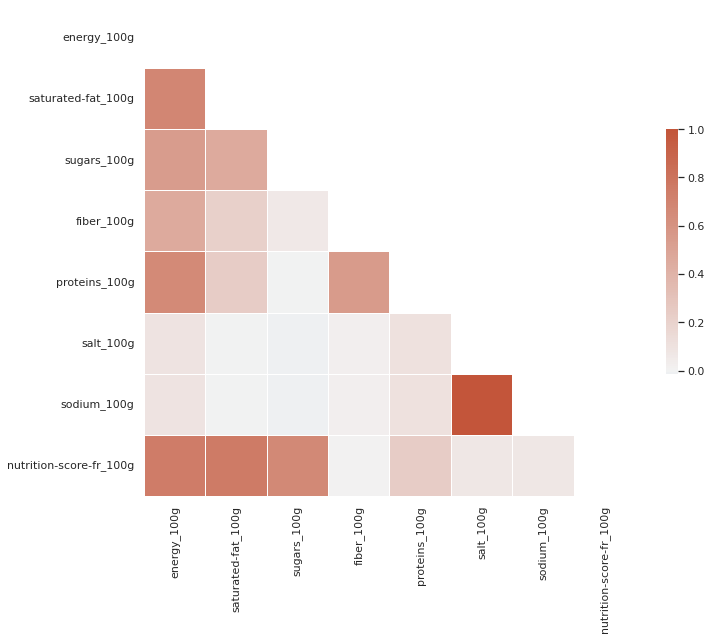

In [45]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_filtree.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.5})

Le sodium est directement lié au sel (facteur 2.5)

In [46]:
data_filtree['sodium_100g']=data_filtree['salt_100g']/2.5
data_filtree.drop(['salt_100g'],axis=1,inplace=True)

In [47]:
data_filtree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12312 entries, 0 to 12311
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     12312 non-null  object 
 1   product_name             12312 non-null  object 
 2   countries_fr             12312 non-null  object 
 3   energy_100g              12305 non-null  float64
 4   saturated-fat_100g       11905 non-null  float64
 5   sugars_100g              11979 non-null  float64
 6   fiber_100g               8646 non-null   float64
 7   proteins_100g            12267 non-null  float64
 8   sodium_100g              11926 non-null  float64
 9   nutrition-score-fr_100g  11793 non-null  float64
 10  pnns_groups_1            12312 non-null  object 
 11  pnns_groups_2            12312 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.1+ MB


In [48]:
print(f' {data_filtree.shape[0]} produits restent dans la base'.format())

 12312 produits restent dans la base


## Traitement des outliers :  

## 1 ) Cas des données limitées à 100g  

Les produits ne peuvent pas avoir plus de 100g si l'on additionne les différentes caractéristiques



In [49]:
# Renomage des colonnes
data_filtree.rename(columns={'nutrition-score-fr_100g':'nutriscore','saturated-fat_100g':'saturated_fat_100g'},inplace=True)

In [50]:
# Création d'une colonne avec la sommes des caractéristiques
data_filtree['Tot_prod']=data_filtree.saturated_fat_100g + data_filtree.sugars_100g + data_filtree.fiber_100g + data_filtree.proteins_100g + data_filtree.sodium_100g
data_filtree.loc[data_filtree['Tot_prod']>100,:]

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2,Tot_prod
7075,3423720002432,Keeny Bio,France,1720.0,3.33,26.7,0.741,6.3,84.400000,22.0,sugary snacks,biscuits and cakes,121.471000
7365,3473710080032,Palets pur beurre,France,3925.0,35.50,52.0,3.000,10.0,0.520192,31.0,sugary snacks,biscuits and cakes,101.020192


In [51]:
# Suppresion des produits classés outliers (la somme de leurs caractéristiques dépassent 100g)
data_filtree.drop(data_filtree[data_filtree.Tot_prod > 100].index,inplace=True)
data_filtree.drop(['Tot_prod'],axis=1,inplace=True)

<AxesSubplot:>

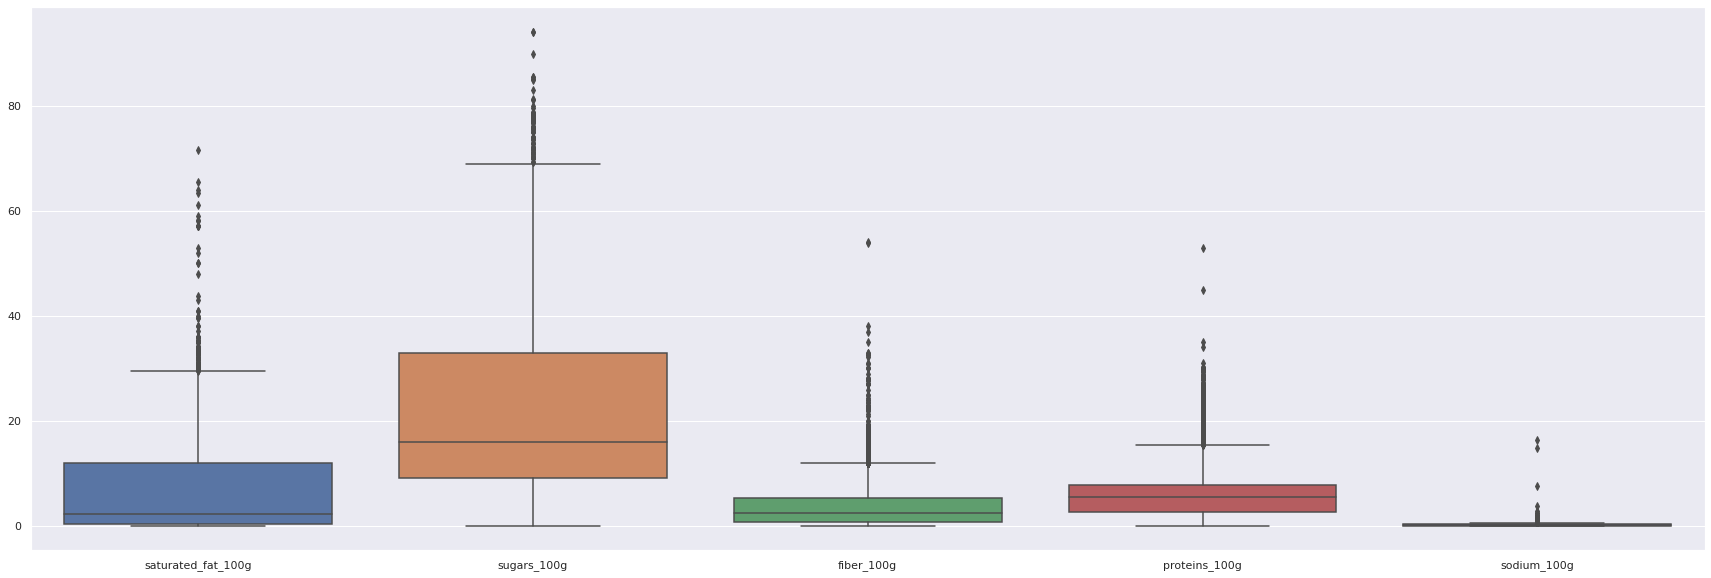

In [52]:
# Affichage des features
data_filtree_temp=data_filtree.drop(['energy_100g','nutriscore'],axis=1)
sns.set()
plt.rcParams["figure.figsize"] = (30,10)
sns.boxplot(data=data_filtree_temp)

## Calcul des quartiles  
Q1 - 1.5 x écart_inter_quartile = borne inf  // dans le cas présent, pas concerné par la borne inf  
Q3 + 1.5 x écart_inter_quartile = borne sup

In [53]:
data_filtree.describe()

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore
count,12303.000000,11903.000000,11977.000000,8644.000000,12265.000000,11924.000000,11791.000000
mean,1314.346164,6.500143,21.935808,3.568784,5.651891,0.159557,10.279874
std,836.220574,7.949297,16.721313,3.873524,4.623953,0.290997,9.764133
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,318.000000,0.300000,9.000000,0.700000,2.600000,0.012000,2.000000
50%,1592.000000,2.300000,16.000000,2.500000,5.500000,0.060000,10.000000
75%,2035.000000,12.000000,33.000000,5.200000,7.700000,0.248000,19.000000
max,9050.000000,71.600000,94.200000,54.000000,53.000000,16.400000,33.000000


In [54]:
# Calcul du nombre de valeurs au dessus du seuil intercatile Q3 + 1.5*(Q3-Q1)

# Calcul Q3
Q3_fat = data_filtree['saturated_fat_100g'].quantile(0.75)
Q3_sugar = data_filtree['sugars_100g'].quantile(0.75)
Q3_fiber = data_filtree['fiber_100g'].quantile(0.75)
Q3_protein = data_filtree['proteins_100g'].quantile(0.75)
Q3_sodium = data_filtree['sodium_100g'].quantile(0.75)
Q3_nrj = data_filtree['energy_100g'].quantile(0.75)

# Calcul Q3-Q1
delta_Q3_sat = Q3_fat-data_filtree['saturated_fat_100g'].quantile(0.25)
delta_Q3_sugar = Q3_sugar-data_filtree['sugars_100g'].quantile(0.25)
delta_Q3_fiber = Q3_fiber-data_filtree['fiber_100g'].quantile(0.25)
delta_Q3_protein = Q3_protein-data_filtree['proteins_100g'].quantile(0.25)
delta_Q3_sodium = Q3_sodium-data_filtree['sodium_100g'].quantile(0.25)
delta_Q3_nrj = Q3_nrj-data_filtree['energy_100g'].quantile(0.25)

# Variables avec le nombre de varaibles au dessus de la limite
variables_sup_Q3_saturated_fat = len(data_filtree[data_filtree['saturated_fat_100g']>Q3_fat + 1.5*delta_Q3_sat])
variables_sup_Q3_sugar = len(data_filtree[data_filtree['sugars_100g']>Q3_sugar+1.5*delta_Q3_sugar])
variables_sup_Q3_fiber = len(data_filtree[data_filtree['fiber_100g']>Q3_fiber+1.5*delta_Q3_fiber])
variables_sup_Q3_protein = len(data_filtree[data_filtree['proteins_100g']>Q3_protein+1.5*delta_Q3_protein])
variables_sup_Q3_sodium = len(data_filtree[data_filtree['sodium_100g']>Q3_sodium+1.5*delta_Q3_sodium])
variables_sup_Q3_NRJ = len(data_filtree[data_filtree['energy_100g']>Q3_nrj+1.5*delta_Q3_nrj])

print(f' Nombre de variables supérieures au Q3 +1.5*DeltaQ3-Q1 : satured-fat = {variables_sup_Q3_saturated_fat}, sugar = {variables_sup_Q3_sugar}, fiber = {variables_sup_Q3_fiber}, \
protein = {variables_sup_Q3_protein}, sodium = {variables_sup_Q3_sodium}, NRJ =  {variables_sup_Q3_NRJ}'.format())

 Nombre de variables supérieures au Q3 +1.5*DeltaQ3-Q1 : satured-fat = 114, sugar = 87, fiber = 270, protein = 408, sodium = 329, NRJ =  1


In [55]:
# Observation des outliers sur satured_fat_100g
data_filtree.loc[data_filtree['saturated_fat_100g']>Q3_fat + 1.5*delta_Q3_sat,:].sort_values('saturated_fat_100g',ascending=False).head(5)

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2
11002,5410456070437,Miko Press Choco,France,1569.0,71.6,1.0,4.5,13.3,0.00000,9.0,sugary snacks,chocolate products
6405,3344290390159,Noix de coco râpée,France,2933.0,65.6,5.0,11.6,7.4,0.02760,5.0,fruits and vegetables,fruits
2713,3222473264490,Noix de coco râpée,France,2794.0,64.0,4.5,15.0,7.3,0.02032,4.0,fruits and vegetables,fruits
8451,3564700463031,Noix de CoCo râpée,France,2962.0,63.5,6.4,10.9,7.9,0.02400,14.0,fruits and vegetables,fruits
9040,3596710345274,Noix de coco râpée,France,2845.0,61.1,6.7,15.1,7.4,0.04000,5.0,fruits and vegetables,fruits


In [56]:
# Observation des outliers sur sugars_100g
data_filtree.loc[data_filtree['sugars_100g']>Q3_sugar+1.5*delta_Q3_sugar,:].sort_values('sugars_100g',ascending=False).head(5)

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2
7592,3532090007425,Meringuettes nature,France,1675.0,0.0,94.2,NaN,2.7,0.00000,14.0,sugary snacks,biscuits and cakes
7593,3532090008781,Meringuettes saveur Framboise,France,1675.0,0.0,94.2,NaN,2.7,0.00000,14.0,sugary snacks,biscuits and cakes
12051,8410442523166,Pocket Fruits Pêche prêt-à-manger,France,1674.0,0.0,90.0,0.0,5.0,0.03048,6.0,fruits and vegetables,fruits
7640,3538280030754,Super Poulain,France,1645.0,1.1,85.5,4.6,3.2,0.00400,10.0,sugary snacks,chocolate products
7639,3538280030631,Super Poulain,France,1645.0,1.1,85.5,4.6,3.2,0.00400,10.0,sugary snacks,chocolate products


In [57]:
# Observation des outliers sur fiber_100g
data_filtree.loc[data_filtree['fiber_100g']>Q3_fiber+1.5*delta_Q3_fiber,:].sort_values('fiber_100g',ascending=False).head(5)

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2
12270,8803560000143,쌀떡,France,983.0,0.0,2.0,54.0,3.0,0.07112,-4.0,sugary snacks,biscuits and cakes
3013,3229820189246,Carrés coupe faim minceur Cacao Gayelord Hauser,France,999.0,1.3,13.1,53.8,1.8,0.03048,-1.0,sugary snacks,biscuits and cakes
6581,3350033000339,Cacao maigre en poudre,France,1411.0,6.9,1.2,38.0,24.0,0.03048,0.0,sugary snacks,chocolate products
10167,3760213860125,Cacao cru,France,2092.0,NaN,NaN,37.0,20.0,NaN,NaN,sugary snacks,chocolate products
12279,8997032221942,Cacao Cru en Poudre,France,2153.0,21.0,0.0,35.0,19.0,0.00400,11.0,sugary snacks,chocolate products


Ces valeurs ne semblent pas être abhérentes, décision de les conserver

In [58]:
# Observation des outliers sur proteins_100g
data_filtree.loc[data_filtree['proteins_100g']>Q3_protein+1.5*delta_Q3_protein,:].sort_values('proteins_100g',ascending=False).head(5)

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2
231,2000000041639,Bulk Powders Nuts About Whey Chocolat Blanc,France,2226.0,4.4,4.5,6.0,53.0,0.0800,-3.0,salty snacks,nuts
107,0202721024277,Pyramide Décongelé X 2 Croustillant Chocolat,France,1541.0,15.0,21.0,NaN,45.0,0.0532,18.0,sugary snacks,biscuits and cakes
1446,3043932523701,BTE 300G LAIT EN POUDRE ECREME VITALITE REGILAIT,France,368.0,0.5,51.0,NaN,35.0,0.4400,15.0,milk and dairy products,milk and yogurt
6750,3380380076367,Nomad' mix soja toasté graines de courge,France,2250.0,6.4,3.3,8.1,34.0,0.7400,5.0,fruits and vegetables,dried fruits
7543,3502490177097,Arachides coques grillées à sec,France,2564.0,9.0,4.7,NaN,31.0,0.0400,16.0,salty snacks,nuts


En recherchant les 4 premiers produits sur le site d'Openfoodfact, il s'avère que seul la pyramide congelée contient une erreur.

In [59]:
# Observation des outliers sur sodium_100g
data_filtree.loc[data_filtree['sodium_100g']>Q3_sodium+1.5*delta_Q3_sodium,:].sort_values('sodium_100g',ascending=False).head(5)

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2
6188,3328481290718,Les Florentins ® Chocolat Lait & Caramel au be...,France,2190.0,14.6,49.2,3.85,6.92,16.40,31.0,sugary snacks,biscuits and cakes
11897,8002873021641,Panettone,France,1551.0,8.0,25.0,2.00,7.00,14.80,24.0,sugary snacks,biscuits and cakes
11029,5411788038836,Umeboshi Past,France,151.0,0.0,5.0,0.00,0.90,7.64,6.0,fruits and vegetables,fruits
132,737282310700,Céréales Croque-matin chocolat,France,1987.0,7.5,23.0,5.90,9.50,3.80,22.0,cereals and potatoes,breakfast cereals
5860,3276650101306,Citrons Confits,France,118.0,0.0,0.9,NaN,0.50,2.72,5.0,fruits and vegetables,fruits


## 2 ) Cas de l'apport energétique

In [60]:
# Observation des outliers sur energy_100g
data_filtree.loc[data_filtree['energy_100g']>Q3_nrj+1.5*delta_Q3_nrj,:]

,code,product_name,countries_fr,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore,pnns_groups_1,pnns_groups_2
6150,3303640001404,Croûtons à l'ail,France,9050.0,3.0,3.5,NaN,8.5,0.696,19.0,cereals and potatoes,bread


Pour les croutons à l'ail, l'apport énergétique usuel est aux alentours de 2000 KJ pour 100g. Il s'agit donc bien d'une valeur abhérente. Pour garder de la robustesse au code, décision également de limiter en fonction de l'intercatile

In [61]:
data_filtree.isna().sum()

code                     0
product_name             0
countries_fr             0
energy_100g              7
saturated_fat_100g     407
sugars_100g            333
fiber_100g            3666
proteins_100g           45
sodium_100g            386
nutriscore             519
pnns_groups_1            0
pnns_groups_2            0
dtype: int64

## Troncature des valeurs par l'intercatile*1.5 + Q3

En effet, notre application doit gérer les potentielles futures valeurs

In [62]:
data_filtree['saturated_fat_100g'].clip(upper=Q3_fat + 1.5*delta_Q3_sat,inplace=True)
data_filtree['sugars_100g'].clip(upper=Q3_sugar+1.5*delta_Q3_sugar,inplace=True)
data_filtree['fiber_100g'].clip(upper=Q3_fiber+1.5*delta_Q3_fiber,inplace=True)
data_filtree['proteins_100g'].clip(upper=Q3_protein+1.5*delta_Q3_protein,inplace=True)
data_filtree['sodium_100g'].clip(upper=Q3_sodium+1.5*delta_Q3_sodium,inplace=True)
data_filtree['energy_100g'].clip(upper=Q3_nrj+1.5*delta_Q3_nrj,inplace=True)


data_filtree.describe()

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore
count,12303.000000,11903.000000,11977.000000,8644.000000,12265.000000,11924.000000,11791.000000
mean,1313.985317,6.430333,21.884426,3.421071,5.424072,0.150360,10.279874
std,833.836675,7.654600,16.559423,3.246365,3.834651,0.174675,9.764133
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,318.000000,0.300000,9.000000,0.700000,2.600000,0.012000,2.000000
50%,1592.000000,2.300000,16.000000,2.500000,5.500000,0.060000,10.000000
75%,2035.000000,12.000000,33.000000,5.200000,7.700000,0.248000,19.000000
max,4610.500000,29.550000,69.000000,11.950000,15.350000,0.602000,33.000000


<AxesSubplot:>

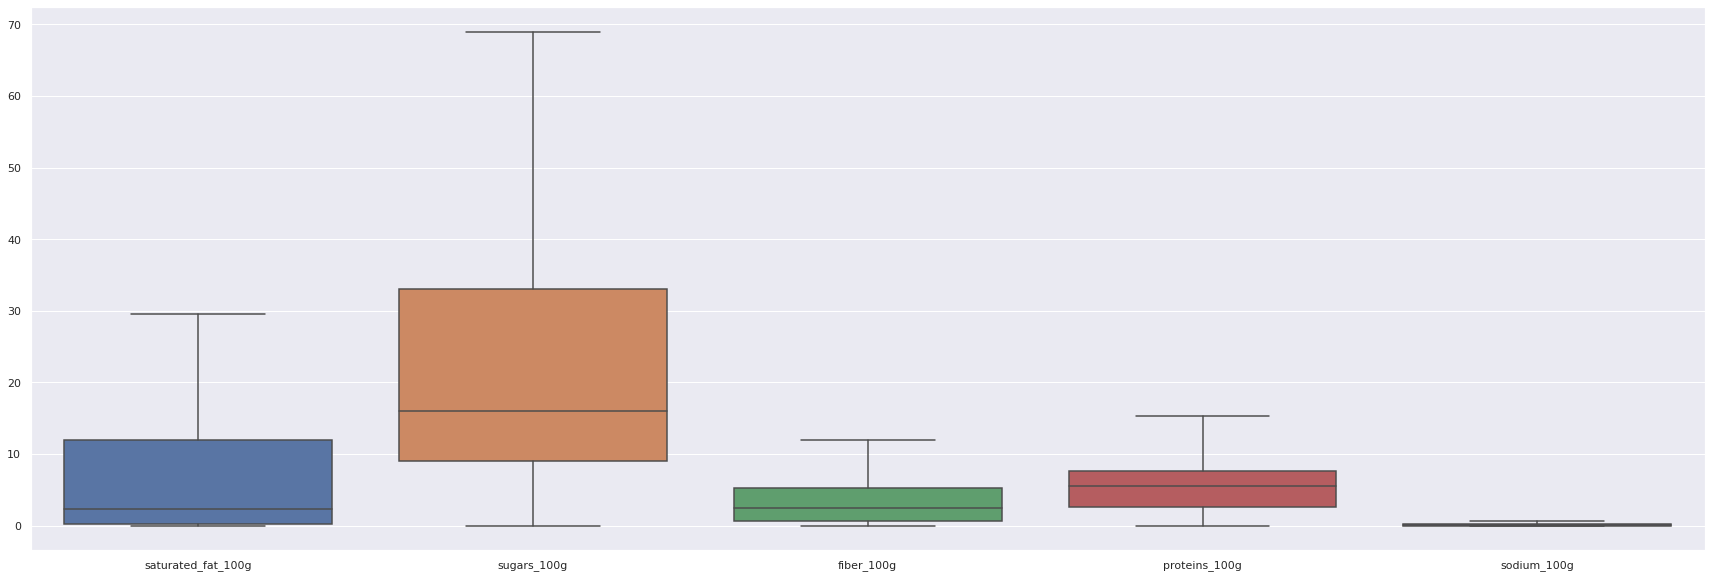

In [63]:
# Affichage des features
data_filtree_temp=data_filtree.drop(['energy_100g','nutriscore'],axis=1)
sns.set()
plt.rcParams["figure.figsize"] = (30,10)
sns.boxplot(data=data_filtree_temp)

<AxesSubplot:>

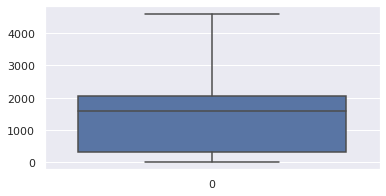

In [64]:
data_filtree_temp2=data_filtree[['energy_100g','nutriscore']]
sns.set()
plt.rcParams["figure.figsize"] = (6,3)
sns.boxplot(data=data_filtree_temp2['energy_100g'])

## Traitement des NA  
Trois approches :
- remplacement par 0  
- remplacement par la moyenne par catégorie
- remplacement par une méthode statistique :  
    - SimpleImputer remplace par 0, la moyenne, la valeur la plus rencontrée ou une constante. Cette méthode s'apparente avec les 2 premières approches
    - iterativeimputer
    - iterativeimputer knn

In [65]:
data_filtree.isna().sum()

code                     0
product_name             0
countries_fr             0
energy_100g              7
saturated_fat_100g     407
sugars_100g            333
fiber_100g            3666
proteins_100g           45
sodium_100g            386
nutriscore             519
pnns_groups_1            0
pnns_groups_2            0
dtype: int64

##  1) Remplissage par 0 ou par la moyenne des catégories

In [66]:
# Création d'un dataframe avec imputation par 0
data_filtree_temp_0=data_filtree.fillna(0)  # imputation par 0

# Création d'un dataframe avec imputation par la moyenne des catégories
data_filtree_temp_moy=data_filtree.copy()
data_filtree_temp_moy['saturated_fat_100g']=data_filtree_temp_moy.groupby('pnns_groups_2')['saturated_fat_100g'].apply(lambda x : x.fillna(x.mean()))
data_filtree_temp_moy['sugars_100g']=data_filtree_temp_moy.groupby('pnns_groups_2')['sugars_100g'].apply(lambda x : x.fillna(x.mean()))
data_filtree_temp_moy['fiber_100g']=data_filtree_temp_moy.groupby('pnns_groups_2')['fiber_100g'].apply(lambda x : x.fillna(x.mean()))
data_filtree_temp_moy['proteins_100g']=data_filtree_temp_moy.groupby('pnns_groups_2')['proteins_100g'].apply(lambda x : x.fillna(x.mean()))
data_filtree_temp_moy['sodium_100g']=data_filtree_temp_moy.groupby('pnns_groups_2')['sodium_100g'].apply(lambda x : x.fillna(x.mean()))
data_filtree_temp_moy['energy_100g']=data_filtree_temp_moy.groupby('pnns_groups_2')['energy_100g'].apply(lambda x : x.fillna(x.mean()))
data_filtree_temp_moy.nutriscore = data_filtree_temp_moy.groupby('pnns_groups_2')['nutriscore'].apply(lambda x : x.fillna(x.mean()))

In [67]:
# Création des dataframes pour la visualistation
df_NRJ = pd.concat([pd.DataFrame(data=data_filtree.energy_100g.values,columns=['Initial']),pd.DataFrame(data=data_filtree_temp_0.energy_100g.values,columns=['NA = 0']),
                    pd.DataFrame(data=data_filtree_temp_moy.energy_100g.values,columns=['NA = Moyenne'])],axis=1)
df_sat_fat = pd.concat([pd.DataFrame(data=data_filtree['saturated_fat_100g'].values,columns=['Initial']),pd.DataFrame(data=data_filtree_temp_0['saturated_fat_100g'].values,columns=['NA = 0']),
                       pd.DataFrame(data=data_filtree_temp_moy['saturated_fat_100g'].values,columns=['NA = Moyenne'])],axis=1)
df_sugar = pd.concat([pd.DataFrame(data=data_filtree.sugars_100g.values,columns=['Initial']),pd.DataFrame(data=data_filtree_temp_0.sugars_100g.values,columns=['NA = 0']),
                      pd.DataFrame(data=data_filtree_temp_moy.sugars_100g.values,columns=['NA = Moyenne'])],axis=1)
df_fiber = pd.concat([pd.DataFrame(data=data_filtree.fiber_100g.values,columns=['Initial']),pd.DataFrame(data=data_filtree_temp_0.fiber_100g.values,columns=['NA = 0']),
                      pd.DataFrame(data=data_filtree_temp_moy.fiber_100g.values,columns=['NA = Moyenne'])],axis=1)
df_prot = pd.concat([pd.DataFrame(data=data_filtree.proteins_100g.values,columns=['Initial']),pd.DataFrame(data=data_filtree_temp_0.proteins_100g.values,columns=['NA = 0']),
                     pd.DataFrame(data=data_filtree_temp_moy.proteins_100g.values,columns=['NA = Moyenne'])],axis=1)
df_sod = pd.concat([pd.DataFrame(data=data_filtree.sodium_100g.values,columns=['Initial']),pd.DataFrame(data=data_filtree_temp_0.sodium_100g.values,columns=['NA = 0']),
                    pd.DataFrame(data=data_filtree_temp_moy.sodium_100g.values,columns=['NA = Moyenne'])],axis=1)

Text(0.5, 1.0, "Comparaison sodium_100g en fonction des différents type d'imputation")

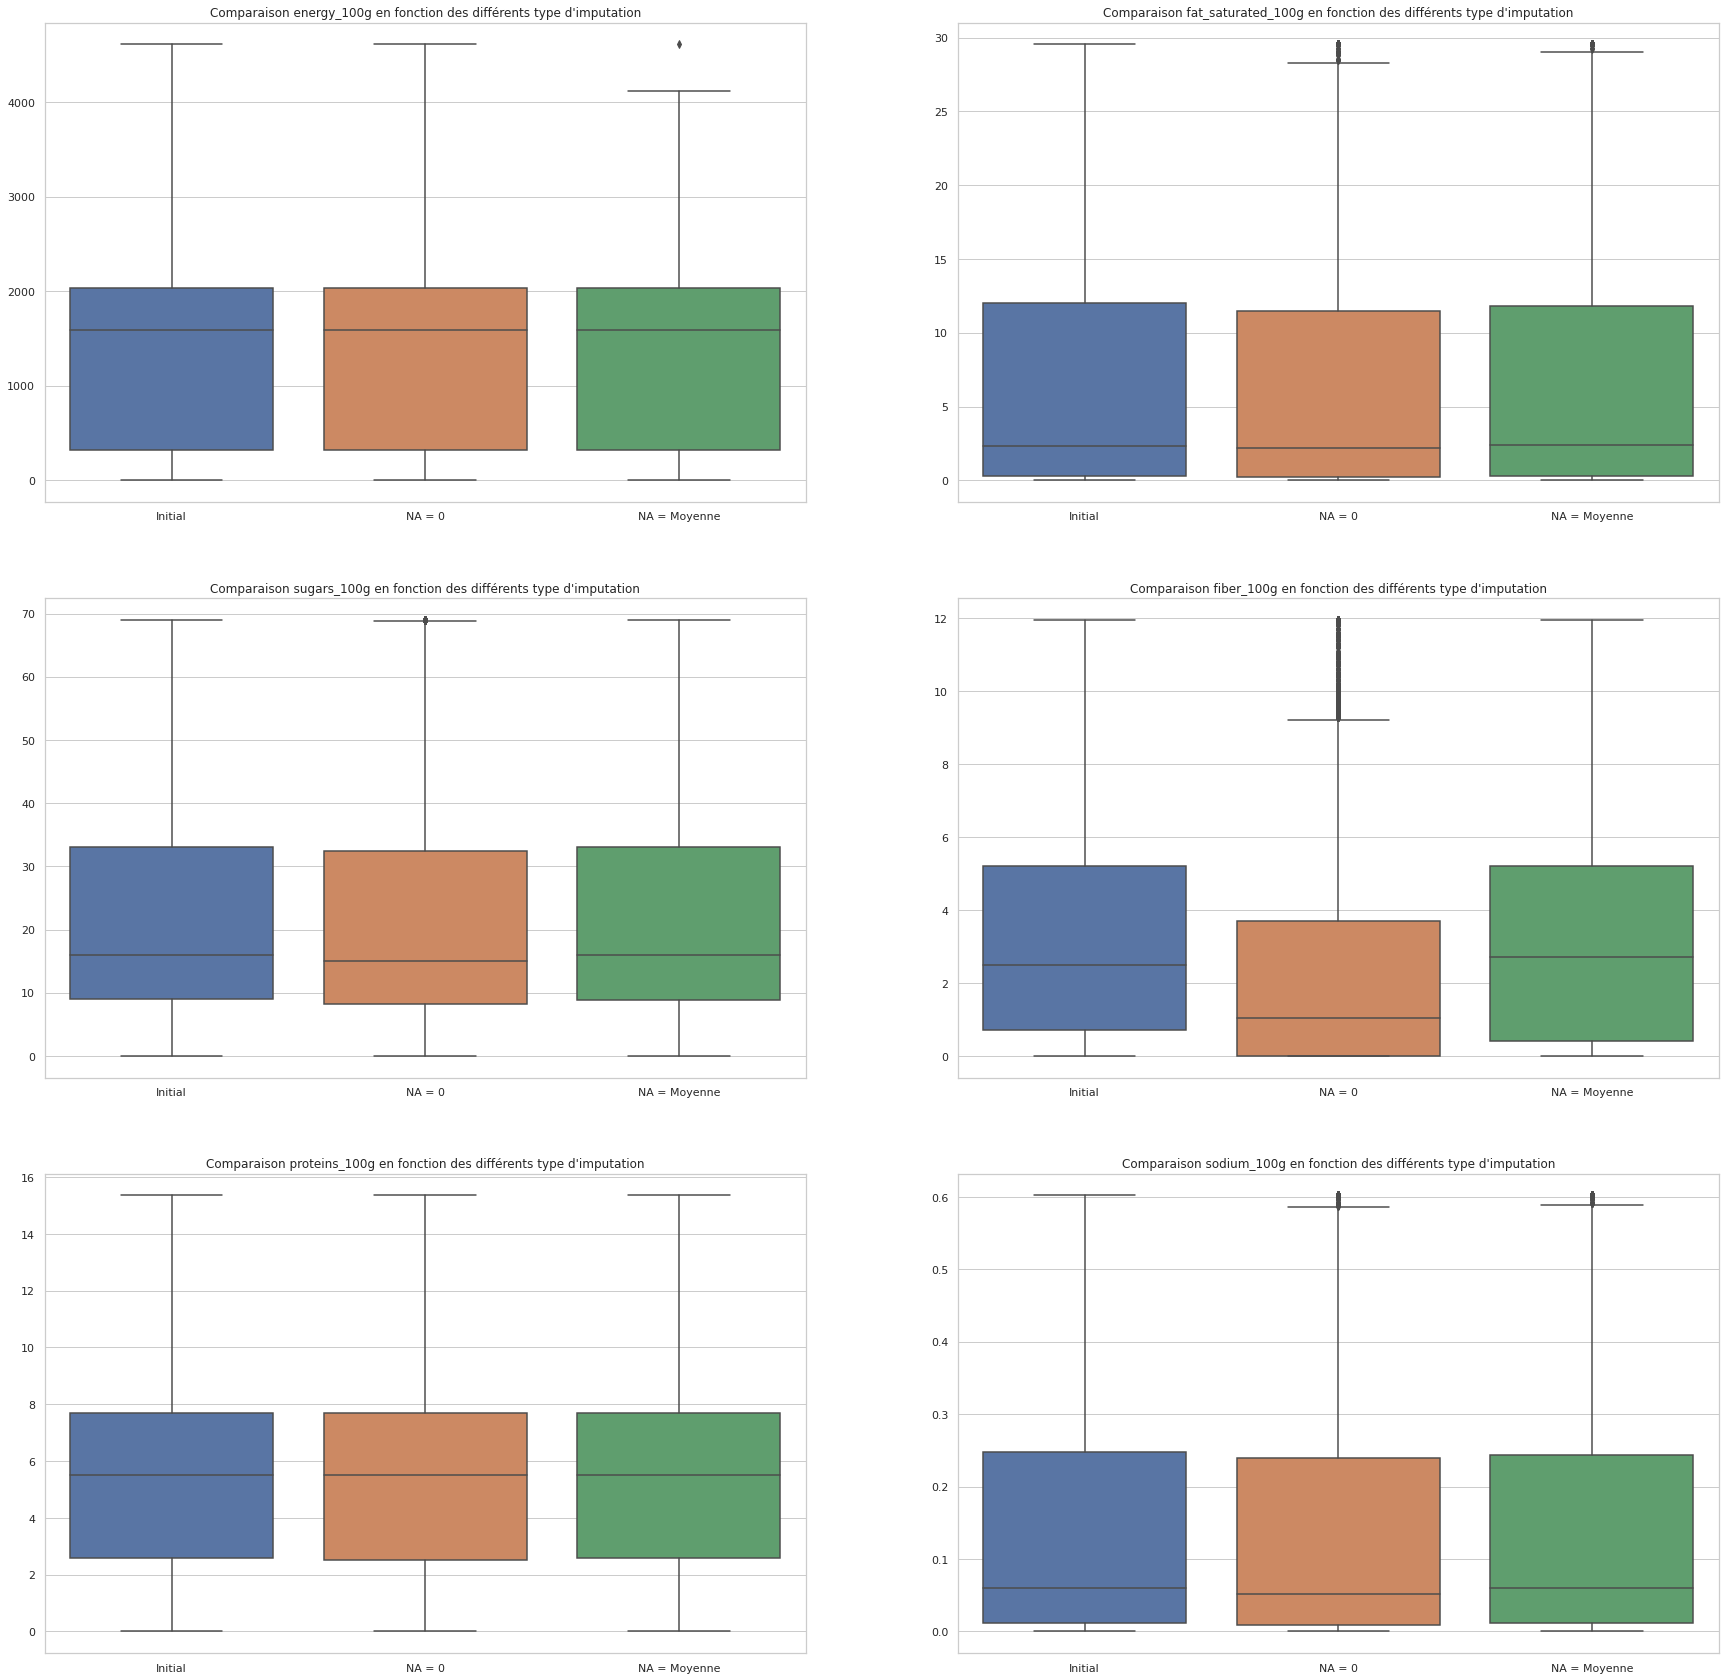

In [68]:
# Visualisation
sns.set(style="whitegrid",font_scale = 1)  # grille du fond + taille de toutes les polices
plt.rcParams["figure.figsize"] = (30,30) # taille de chacune des figures
fig, axes = plt.subplots(3,2)  #3 lignes et 2 colonnes de subplot

sns.boxplot(data=df_NRJ,ax=axes[0,0])
sns.boxplot(data=df_sat_fat,ax=axes[0,1])
sns.boxplot(data=df_sugar,ax=axes[1,0])
sns.boxplot(data=df_fiber,ax=axes[1,1])
sns.boxplot(data=df_prot,ax=axes[2,0])
sns.boxplot(data=df_sod,ax=axes[2,1])

axes[0,0].set_title('Comparaison energy_100g en fonction des différents type d\'imputation')
axes[0,1].set_title('Comparaison fat_saturated_100g en fonction des différents type d\'imputation')
axes[1,0].set_title('Comparaison sugars_100g en fonction des différents type d\'imputation')
axes[1,1].set_title('Comparaison fiber_100g en fonction des différents type d\'imputation')
axes[2,0].set_title('Comparaison proteins_100g en fonction des différents type d\'imputation')
axes[2,1].set_title('Comparaison sodium_100g en fonction des différents type d\'imputation')

Les différentes techniques de remplissage ont peu d'influence sur les distributions

## 2 ) Imputation par une méthode numérique
## 2-1 ) Iterative Imputer

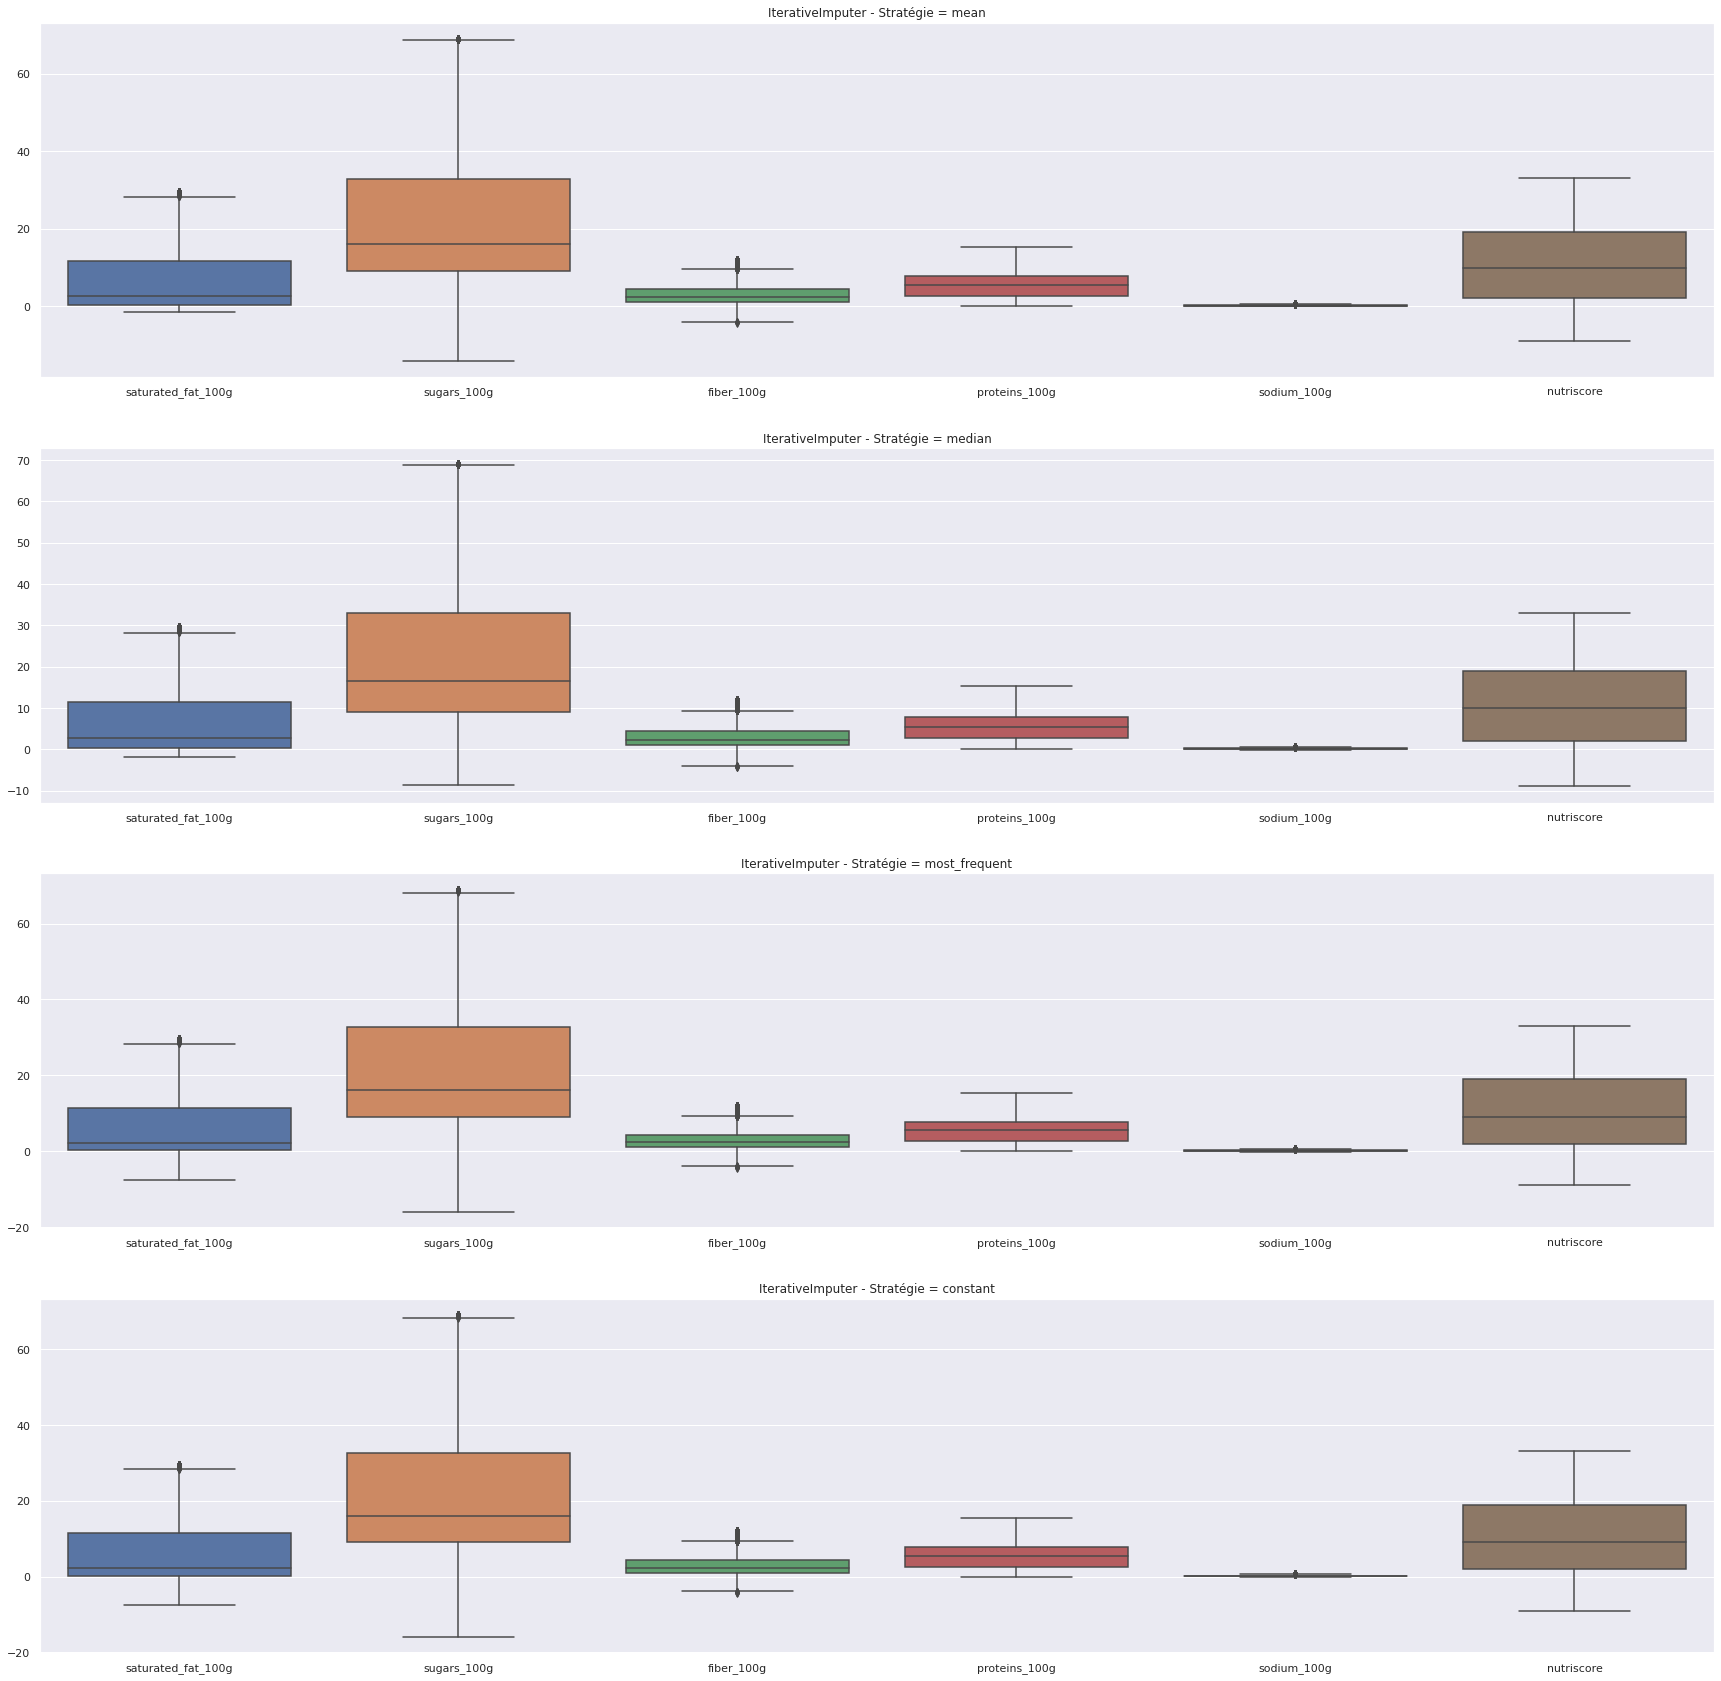

In [69]:
data_filtree_II=data_filtree.drop(['product_name','countries_fr','pnns_groups_1','pnns_groups_2'],axis=1)
Liste_results_II = []
i=0

sns.set()
fig, axes = plt.subplots(4)  #3 lignes et 2 colonnes de subplot

for strategie in ['mean','median','most_frequent','constant']:
    input_II = IterativeImputer(initial_strategy=strategie)  # Initialisation de l'Imputer
    imputed_II=input_II.fit_transform(data_filtree_II)  # Entrainement et imputation des valeurs 
    data_filtree_II_imputed = pd.DataFrame(imputed_II, columns=data_filtree_II.columns) # Création du dataframe avec les valeurs imputées
    
    Liste_results_II.append(['La stratégie utilisée est :' + strategie , data_filtree_II_imputed.describe()])  # Ecriture des résultats dans une liste
    Liste_results_II.append('-------------------------------------------------------------')
    
    data_filtree_II_imputed_visu = data_filtree_II_imputed.drop(['code','energy_100g'],axis=1) # Création du dataframe pour la visu (energy n'a pas la meme échelle et code n'est pas à regarder)
    sns.boxplot(data=data_filtree_II_imputed_visu,ax=axes[i])
    axes[i].set_title(f'IterativeImputer - Stratégie = {strategie}')
    i+=1

In [70]:
Liste_results_II

[['La stratégie utilisée est :mean',
                 code   energy_100g  saturated_fat_100g   sugars_100g  \
  count  1.231000e+04  12310.000000        12310.000000  12310.000000   
  mean   3.758035e+12   1314.044990            6.413711     21.827936   
  std    5.813748e+12    833.660457            7.536487     16.418745   
  min    1.000000e+01      2.000000           -1.564412    -14.196776   
  25%    3.229821e+12    319.000000            0.300000      9.000000   
  50%    3.297760e+12   1592.000000            2.600000     16.000000   
  75%    3.596710e+12   2035.000000           11.500000     32.900000   
  max    3.564701e+14   4610.500000           29.550000     69.000000   
  
           fiber_100g  proteins_100g   sodium_100g    nutriscore  
  count  12310.000000   12310.000000  12310.000000  12310.000000  
  mean       3.093746       5.421616      0.150076     10.199572  
  std        2.955505       3.834627      0.172883      9.643528  
  min       -4.324775       0.00000

Cette méthode ne fournit pas de résultats probant, en effet, des valeurs négatives sont rajoutées

## 2-1) Imputer KNN

In [71]:
data_filtree.pnns_groups_2.unique()

array(['biscuits and cakes', 'dried fruits', 'nuts', 'breakfast cereals',
       'fruits', 'fruit juices', 'bread', 'chocolate products',
       'milk and yogurt', 'fruit nectars'], dtype=object)

In [72]:
# Ajout d'une colonne correspondant à la valeur numérique des catégories
data_filtree['pnns_groups_2']= data_filtree['pnns_groups_2'].astype('category')
data_filtree['pnns_groups_2_number'] = data_filtree['pnns_groups_2'].cat.codes
data_filtree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12310 entries, 0 to 12311
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code                  12310 non-null  object  
 1   product_name          12310 non-null  object  
 2   countries_fr          12310 non-null  object  
 3   energy_100g           12303 non-null  float64 
 4   saturated_fat_100g    11903 non-null  float64 
 5   sugars_100g           11977 non-null  float64 
 6   fiber_100g            8644 non-null   float64 
 7   proteins_100g         12265 non-null  float64 
 8   sodium_100g           11924 non-null  float64 
 9   nutriscore            11791 non-null  float64 
 10  pnns_groups_1         12310 non-null  object  
 11  pnns_groups_2         12310 non-null  category
 12  pnns_groups_2_number  12310 non-null  int8    
dtypes: category(1), float64(7), int8(1), object(4)
memory usage: 1.4+ MB


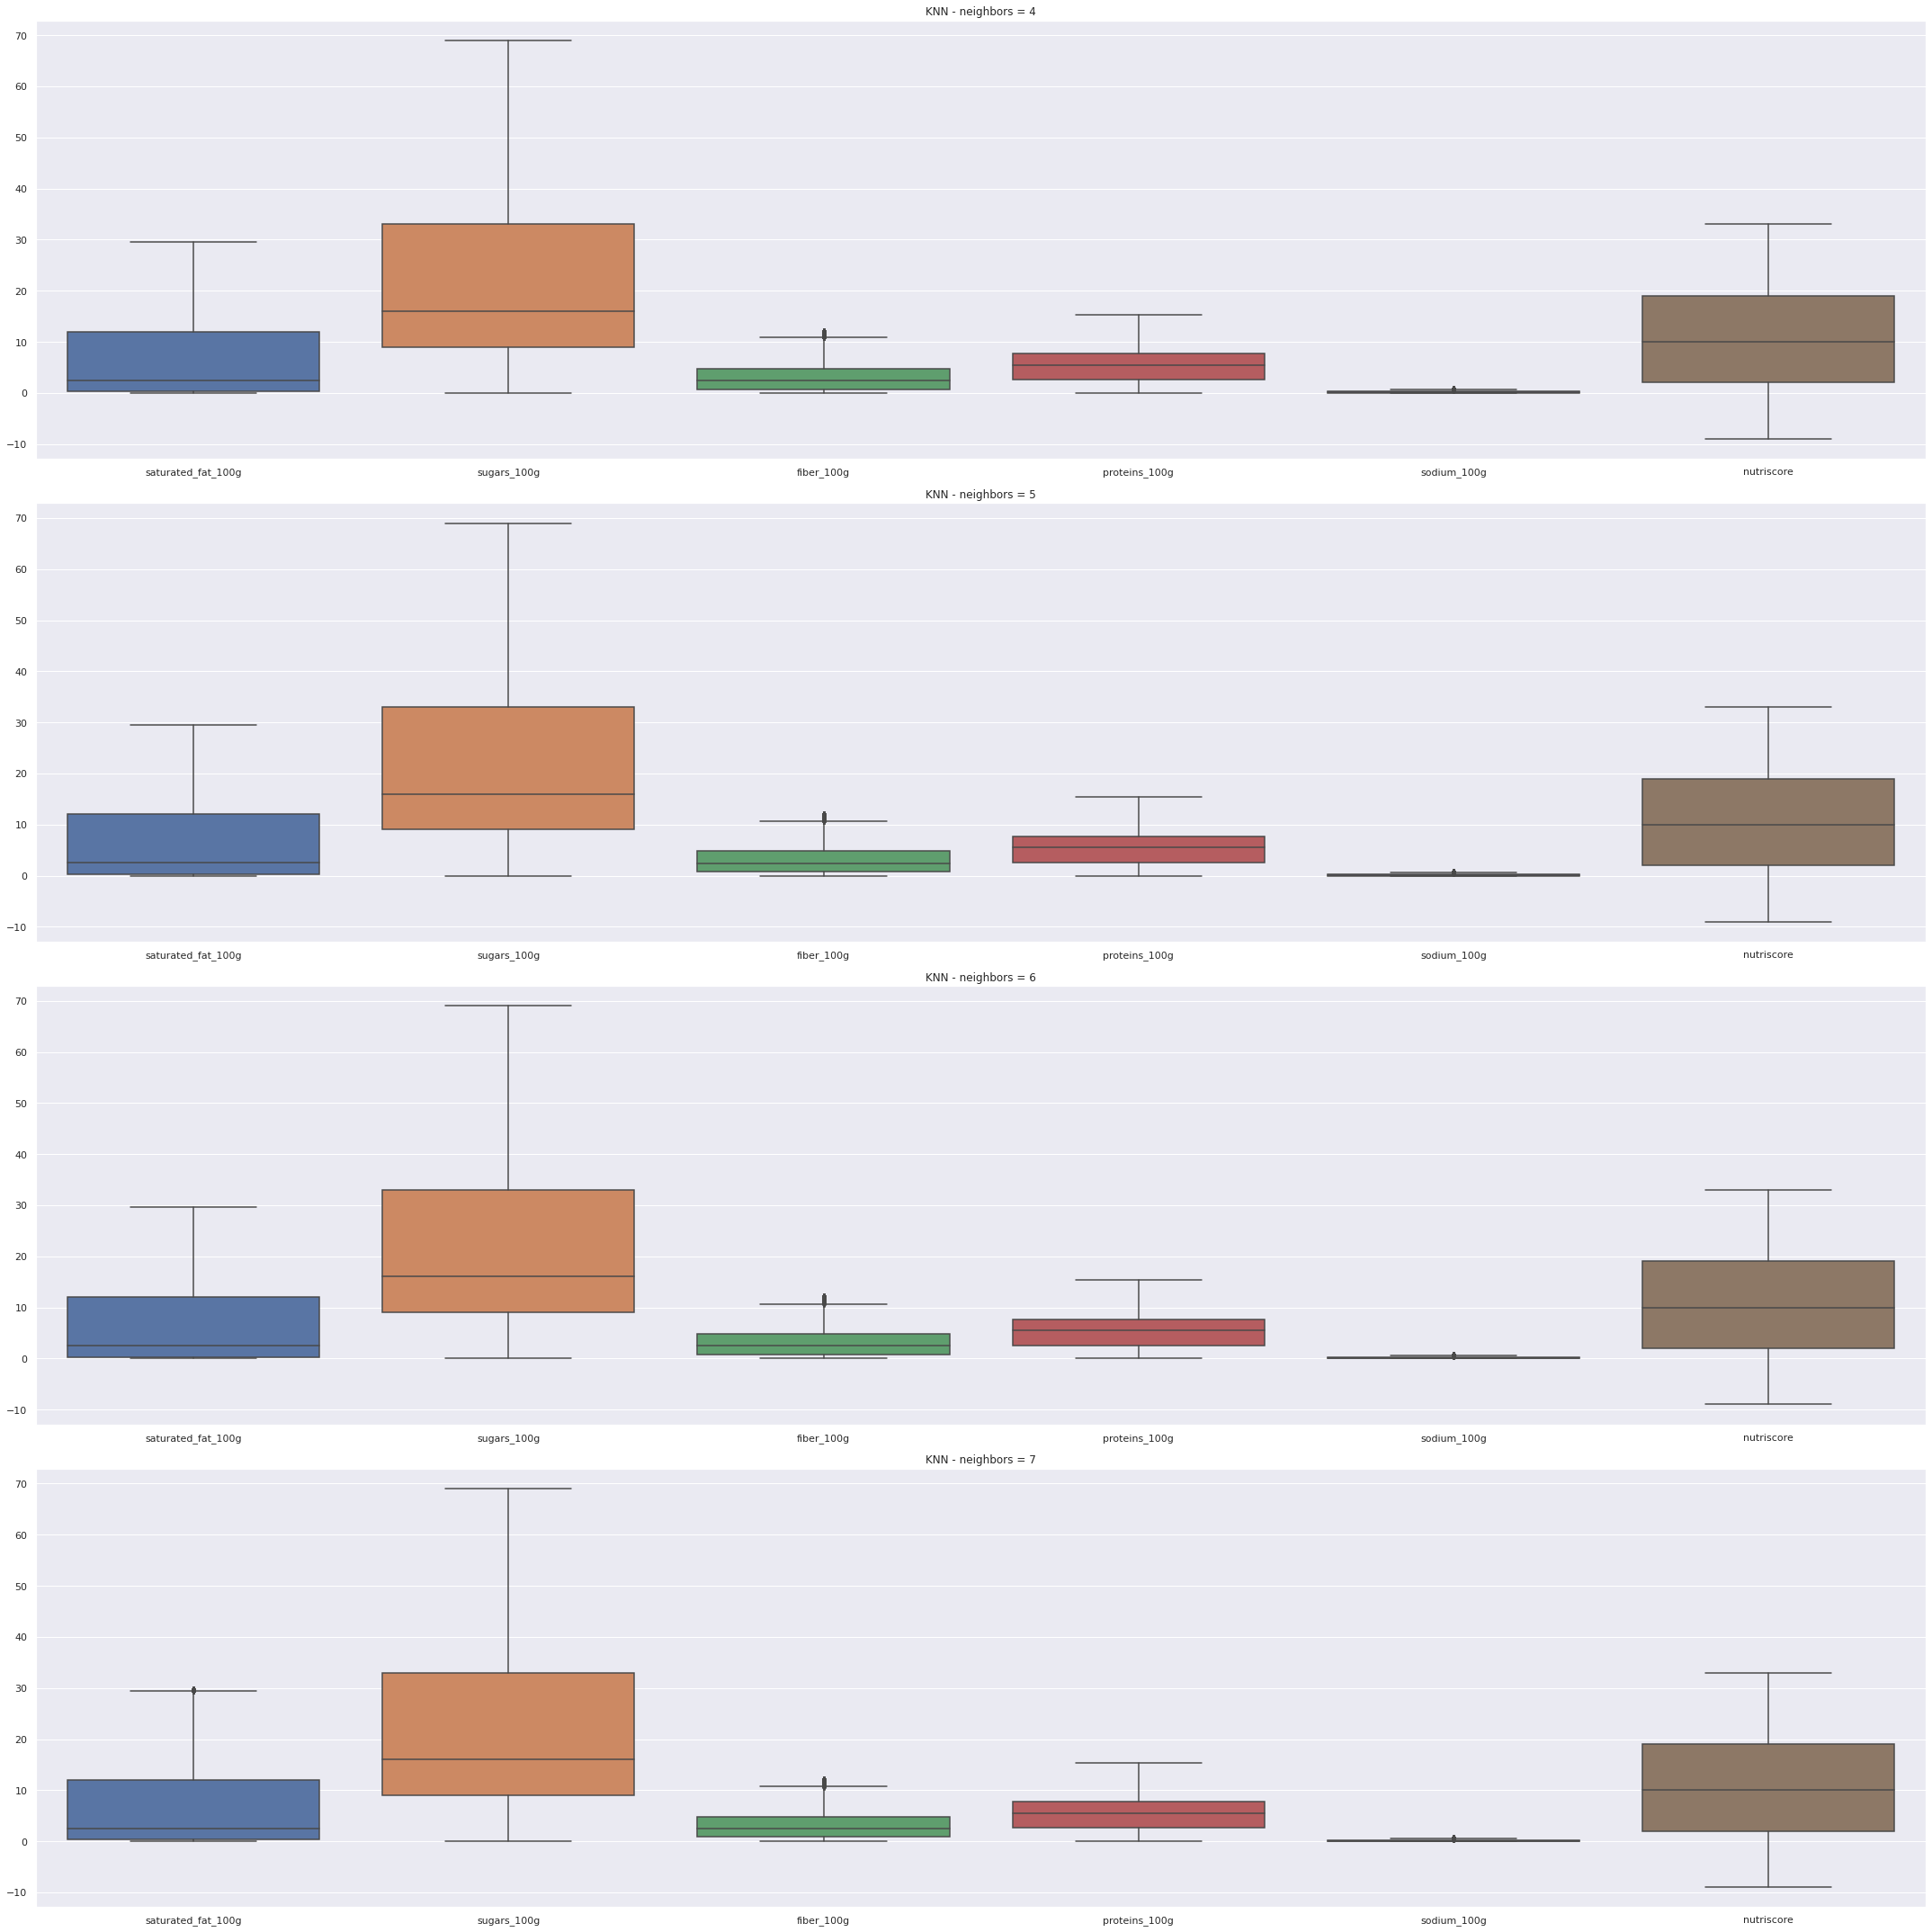

In [73]:
data_filtree_KNN=data_filtree.drop(['product_name','countries_fr','pnns_groups_1','pnns_groups_2','pnns_groups_2_number'],axis=1) # Création d'un dataframe avec seulement les valeurs numériques
i=0
Liste_results_KNN = []

sns.set()
fig, axes = plt.subplots(4)  

for voisin in range(4,8):
    imput_KNN = KNNImputer(n_neighbors=voisin) # Initialisation de l'Imputer
    imputed_KNN=imput_KNN.fit_transform(data_filtree_KNN)  # Entrainement et écritures des valeurs imputées
    data_filtree_KNN_imputed = pd.DataFrame(imputed_KNN, columns=data_filtree_KNN.columns) # CRéation du dataframe avec les valeurs imputées
    
    Liste_results_KNN.append(['Nombre de voisin choisi : ' + str(voisin), data_filtree_KNN_imputed.describe()]) # Inscription des résultats dans une liste
    Liste_results_KNN.append('---------------------------------------------------------------')
    
    data_filtree_KNN_imputed_visu = data_filtree_KNN_imputed.drop(['code','energy_100g'],axis=1) # Dataframe final de visu
    sns.boxplot(data=data_filtree_KNN_imputed_visu,ax=axes[i])

    axes[i].set_title(f'KNN - neighbors = {voisin}')
    i+=1
    fig.tight_layout() 

In [74]:
Liste_results_KNN

[['Nombre de voisin choisi : 4',
                 code   energy_100g  saturated_fat_100g   sugars_100g  \
  count  1.231000e+04  12310.000000        12310.000000  12310.000000   
  mean   3.758035e+12   1313.927842            6.428170     21.923808   
  std    5.813748e+12    833.824927            7.593347     16.473957   
  min    1.000000e+01      2.000000            0.000000      0.000000   
  25%    3.229821e+12    318.250000            0.300000      9.000000   
  50%    3.297760e+12   1592.000000            2.487500     16.000000   
  75%    3.596710e+12   2035.000000           12.000000     33.000000   
  max    3.564701e+14   4610.500000           29.550000     69.000000   
  
           fiber_100g  proteins_100g   sodium_100g    nutriscore  
  count  12310.000000   12310.000000  12310.000000  12310.000000  
  mean       3.210718       5.421132      0.150146     10.290008  
  std        3.011981       3.832031      0.173173      9.679947  
  min        0.000000       0.000000   

Les résultats sont relativement similaires. Choix de conserver neighbors = 5

In [75]:
data_filtree_KNN_imputed.describe()

,code,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore
count,1.231000e+04,12310.000000,12310.000000,12310.000000,12310.000000,12310.000000,12310.000000,12310.000000
mean,3.758035e+12,1313.957781,6.440341,21.936881,3.252249,5.421809,0.150286,10.296959
std,5.813748e+12,833.702173,7.584110,16.445932,2.976994,3.831000,0.172988,9.658688
min,1.000000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,3.229821e+12,319.000000,0.300000,9.000000,0.832143,2.600000,0.012000,2.000000
50%,3.297760e+12,1592.000000,2.500000,16.050000,2.500000,5.500000,0.060000,10.000000
75%,3.596710e+12,2035.000000,11.998214,33.000000,4.800000,7.700000,0.244000,19.000000
max,3.564701e+14,4610.500000,29.550000,69.000000,11.950000,15.350000,0.602000,33.000000


In [76]:
# Préaparation du dataframe Export
# Utilisation du KNN imputer avec 5 neighbors

data_filtree_KNN_export=data_filtree.drop(['product_name','countries_fr','pnns_groups_1','pnns_groups_2','pnns_groups_2_number'],axis=1)
imput_KNN = KNNImputer(n_neighbors=5)
imputed_KNN_export=imput_KNN.fit_transform(data_filtree_KNN_export)
data_filtree_KNN_imputed_export = pd.DataFrame(imputed_KNN_export, columns=data_filtree_KNN_export.columns) # Création du dataframe Export
data_filtree_KNN_imputed_export['code']=data_filtree_KNN_imputed_export['code'].astype(int) # Remise des codes en entiers pour enlever les chiffres après la virgule
data_filtree_KNN_imputed_export

,code,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutriscore
0,10,1900.0,2.5,26.0,1.5,6.0,0.264,12.0
1,30,1768.0,2.5,28.0,1.8,5.8,0.260,13.0
2,31,1670.0,2.0,34.0,1.5,4.9,0.240,12.0
3,50,1868.0,10.0,39.0,1.7,8.0,0.220,22.0
4,51,1896.0,10.0,37.0,2.5,8.1,0.312,22.0
...,...,...,...,...,...,...,...,...
12305,9501006300039,206.0,0.0,9.7,1.9,0.6,0.004,-5.0
12306,9556417639339,1218.0,1.0,14.0,0.3,8.0,0.024,2.0
12307,9556587103869,1309.0,9.0,5.1,6.5,6.0,0.360,10.0
12308,9577283844672,192.0,0.0,9.2,0.6,0.6,0.012,4.0


In [77]:
## Préparation export
data_filtree['code']=data_filtree['code'].astype(int)
data.drop_duplicates(subset=['code'],inplace=True)
data_export_temp=pd.merge(data_filtree_KNN_imputed_export,data_filtree[['code','product_name','pnns_groups_1','pnns_groups_2']],how='left',on='code') # Rajout des catégories issues du dataframe global sur le dataframe avec les valeurs imputées
print(data_export_temp.shape) # Vérification des dimensions avant merge
data_export = pd.merge(data_export_temp,data[['code','labels_fr','image_url']],how='left',on='code')
print(data_export.shape) # Vérification des dimensions après merge

(12310, 11)
(12310, 13)


In [78]:
## Exportation en csv
data_export.to_csv('Data_filtree_P3.csv',sep=',')

# <p style="color:red">FIN</p>